In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [3]:
f = r.TFile("./results_EndGame_5042A.root") #processed output of hadd.sh

#check if the directory where we will be saving the images exists
prodString="EndGame_5042A"
directory = os.path.dirname("./images/"+prodString+"/")
if not os.path.exists(directory):
    print("Creating Image Directory:", directory)
    os.makedirs(directory)
else:
    print("Image Directory", directory,"exists. Continuing.")

Image Directory ./images/EndGame_5042A exists. Continuing.


In [4]:
f.cd("farline/calo1")
#f.ls()

True

Print all of the embedded histograms.

1,685,858,685 Entries in these histograms
340,595,318 Entries in these histograms
1,685,858,685 Entries in these histograms
117,480,092 Entries in these histograms


Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_farlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_farlineHistograms.root has been created


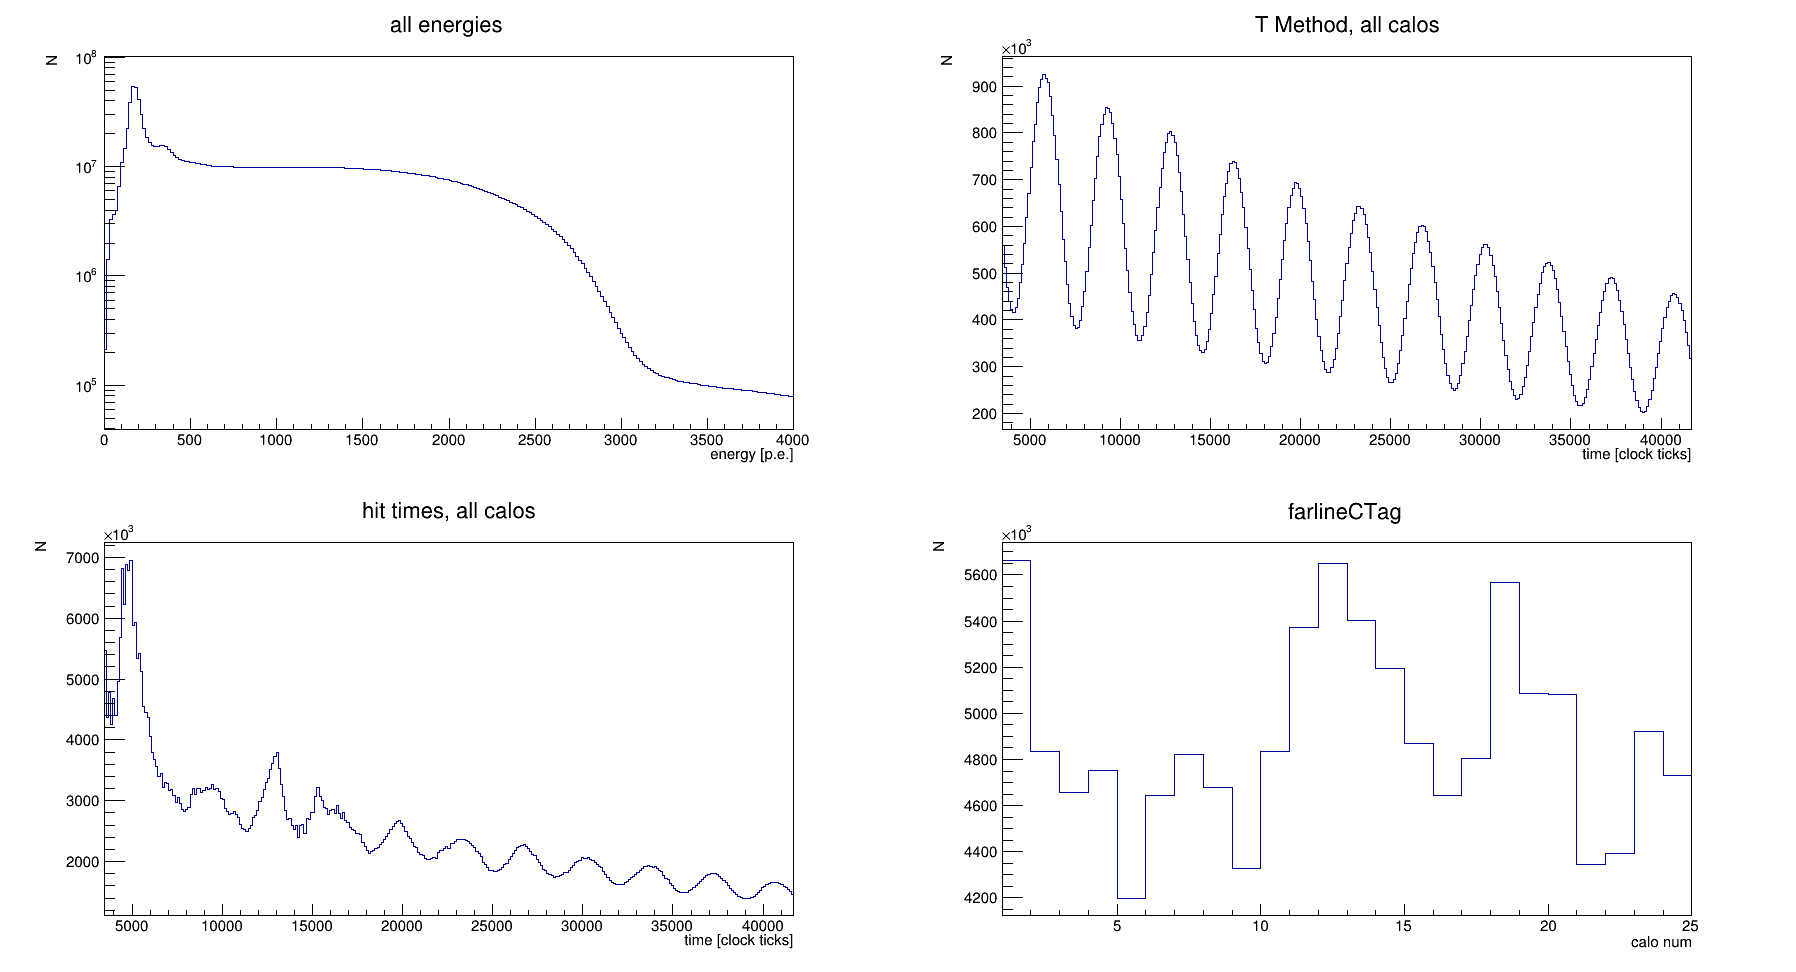

In [5]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
r.gPad.SetLogy()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloWiggle.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloTimes.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(farlineCtag.GetEntries())), "Entries in these histograms")

# Now lets make a wiggle plot of all of the calos

In [6]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

### Five parameter fit

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=5434.48 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         416 TOTAL
                     EDM=1.37117e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            7.21550e+05   9.26559e+01  -2.69109e-03  -1.90165e-11
   2  #tau         6.41201e+01   4.64372e-03  -1.12383e-07  -1.92120e-06
   3  A            4.02565e-01   9.48123e-05  -1.05886e-08   1.58563e-05
   4  R           -1.18101e+01   2.67782e+00  -1.89438e-05  -1.23808e-08
   5  #phi        -1.06636e+00   4.36828e-04   4.36828e-04   1.92415e-03
 FCN=5434.48 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=4.35076e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SI

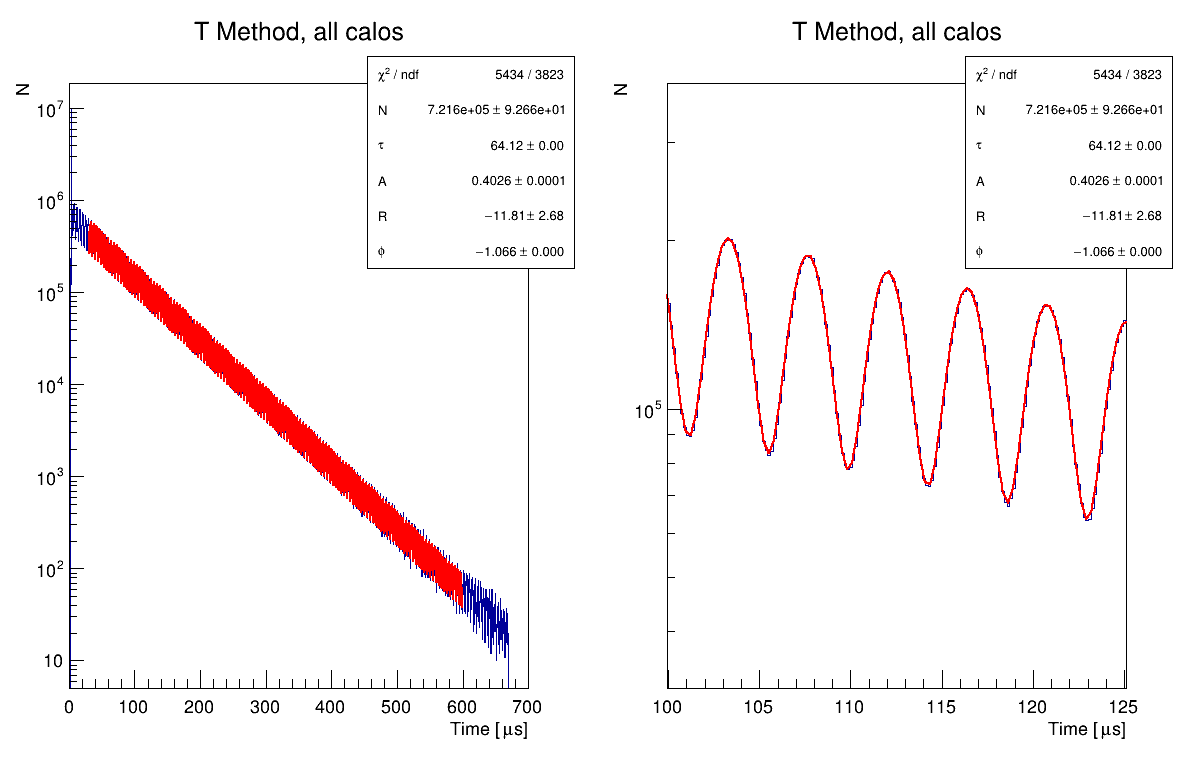

In [8]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func","REM")

    
chiSqAll = ( ( func.GetNDF(),
              func.GetChisquare(),
              func.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_TmethodWiggleFitAllCalos.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_TmethodWiggleFitAllCalos.root has been created


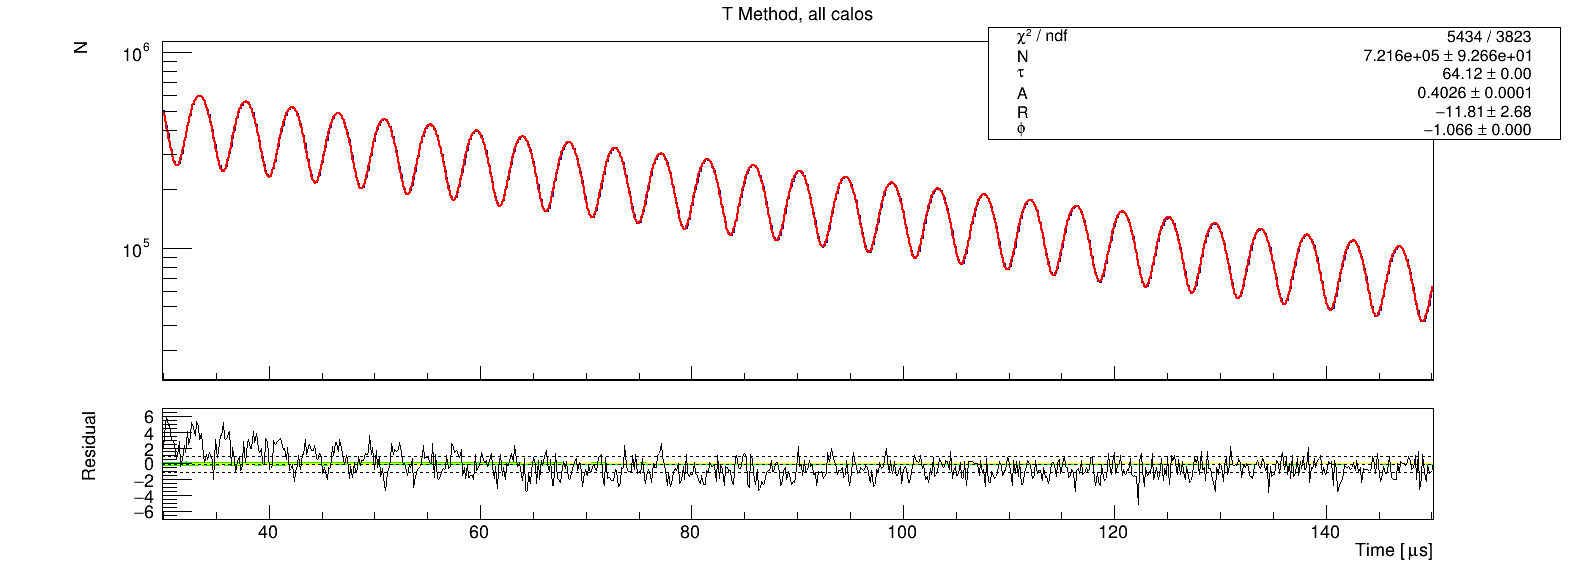

In [9]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas("c","c",1600,600)
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-7,7)

allCaloWiggle.GetXaxis().SetRangeUser(30,150)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.root")

### Fourier transform of the 5-parameter residuals.

4700
3828 [(30.010638297872337, 1452.3326963977306), (30.159574468085104, 3425.3690587221063), (30.30851063829787, 3844.085722945456), (30.457446808510635, 3023.254225052893), (30.606382978723403, 3001.27531195333)]
3828 569.9787234042552 29.93618966628871 599.9149130705439
0.1488972631672558 0.0017544514539549819
13.43208033147934 6.71604016573967


Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_5ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_5ParamResiduals.root has been created


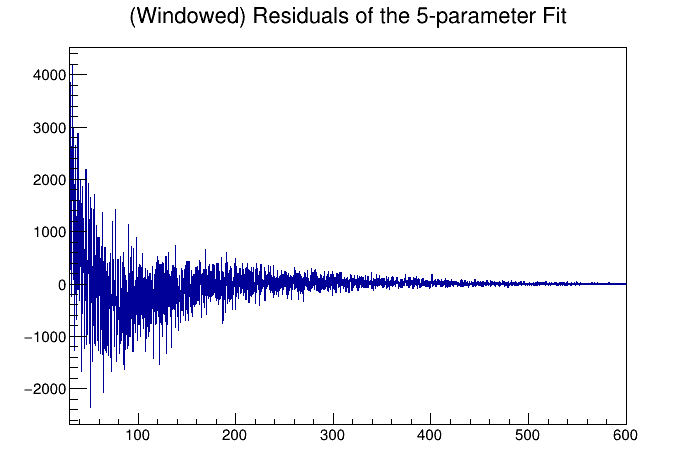

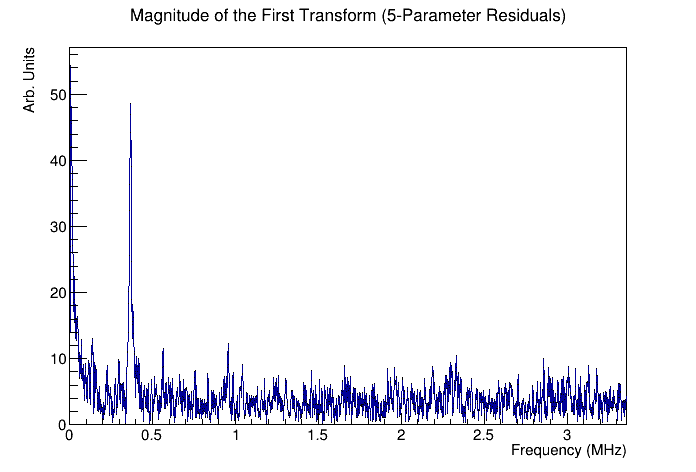

In [10]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 600):
        residVec.append( (binCenterX, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Lets fit some of these peaks, see if we can isolate the exact frequencies

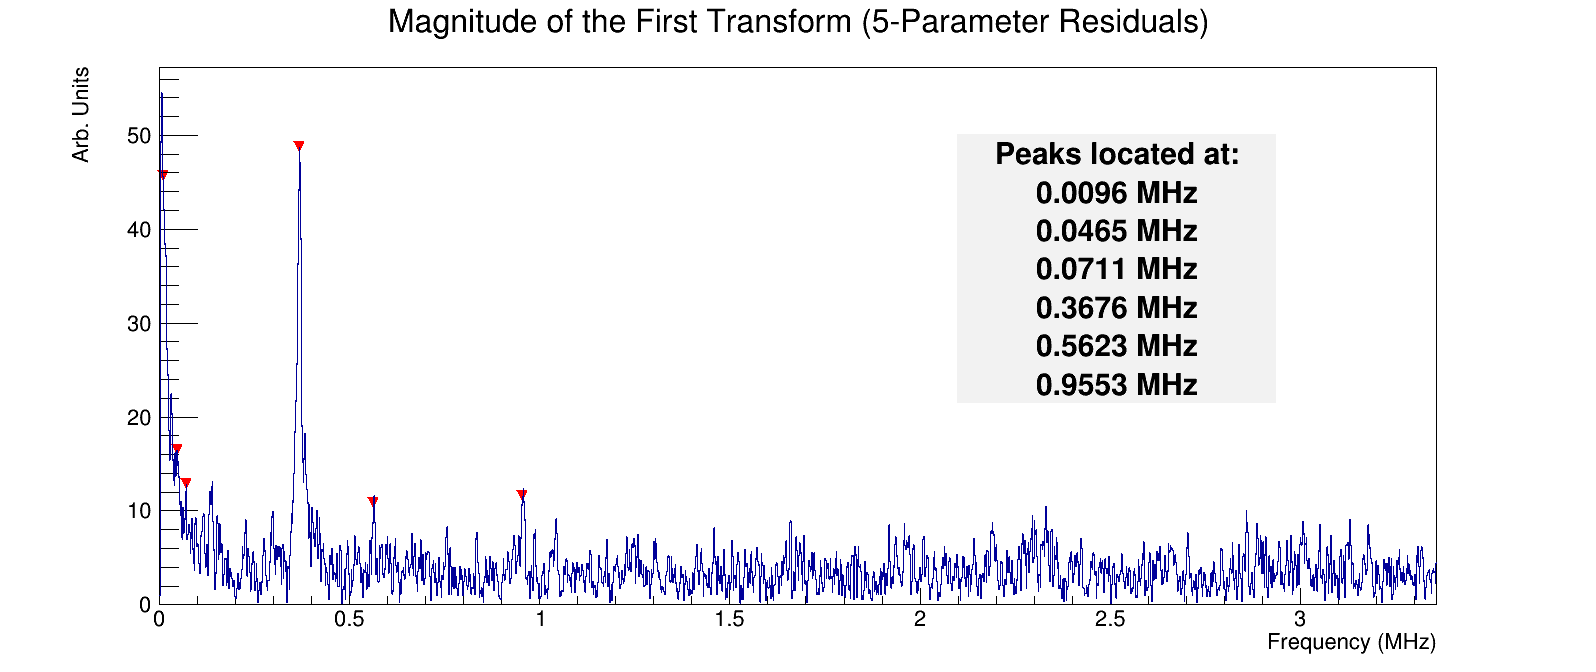

In [11]:
spec = r.TSpectrum(10)
npeaks = spec.Search(hxform, 
                3,      #sigma, see manual
                "",     #options
                0.15)

c = r.TCanvas("c","c",1600,700)
hxform.Draw("pl")
hxform.Draw("hist same")
spec.Draw("same")

text = r.TPaveText(.6,.4,.8,.8,"NDC")
text.AddText("Peaks located at:")
peaks = []
for x in range(npeaks):
    peaks.append(spec.GetPositionX()[x])
peaks.sort()
for x in range(npeaks):
    text.AddText(str(round(peaks[x],4))+" MHz")
if(npeaks == 0):
    print("ERROR: No peaks found in xtal", i)
    text.AddText("No peaks found")
    potentialLostCauses.append(i)
text.Draw("SAME")

c.Draw()

double check the root fft result with the python fft module

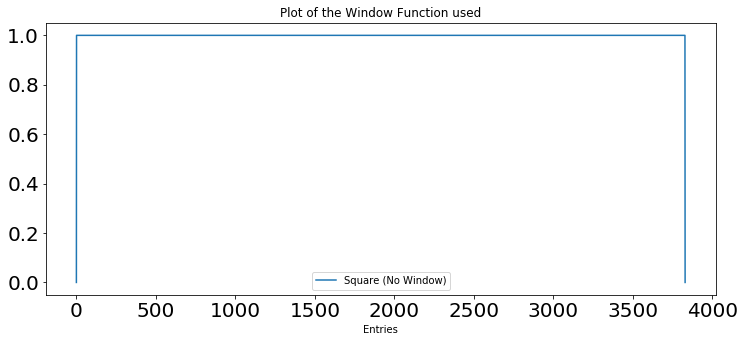

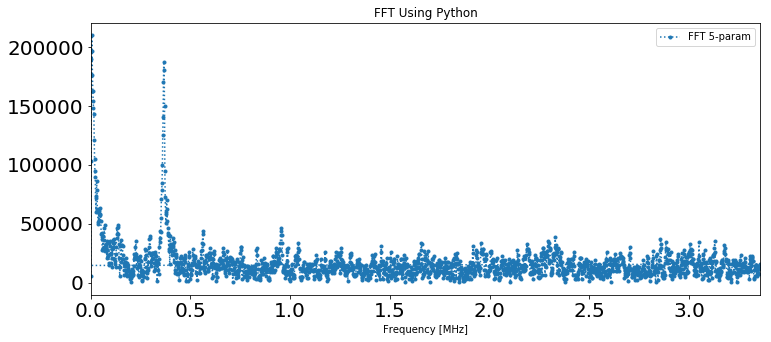

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([0]+welchVec+[0],label='Square (No Window)')
plt.title("Plot of the Window Function used")
plt.xlabel("Entries")
plt.legend()
plt.show()

ding = np.fft.fft(np.array(bins))

n = len(bins)
d = (centers[1] - centers[0])*math.pow(10.0,-6)

freq = np.fft.fftfreq(n, d)


fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/(10**6) for x in freq],np.abs(ding),'.:',label='FFT 5-param')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,6.7157787731503555 / 2)# *10.**6)
plt.legend()
plt.show()

3828 [(30.010638297872337, 1452.3326963977306), (30.159574468085104, 3425.3690587221063), (30.30851063829787, 3844.085722945456), (30.457446808510635, 3023.254225052893), (30.606382978723403, 3001.27531195333)]


Warning in <TDirectoryFile::Append>: Replacing existing TH1: htest (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file hi.root has been created


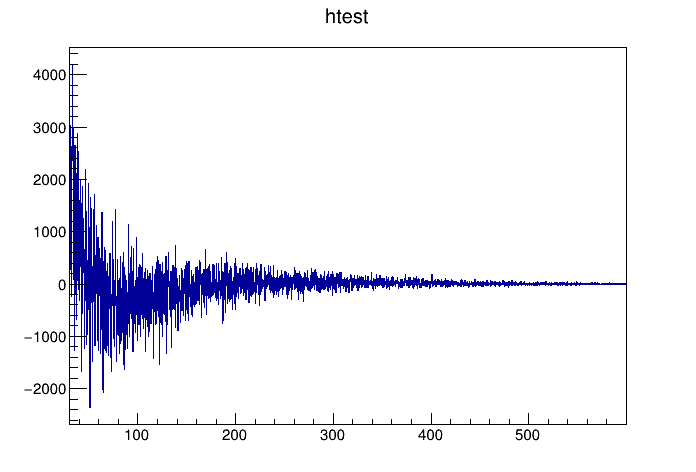

In [13]:
print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
c = r.TCanvas()
htest.Draw()
c.Draw()
c.Print("hi.root")

___

# Now lets make some plots from the individual calorimeters.

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24


Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_calo01_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_calo01_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_calo02_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_calo02_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_calo03_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_calo03_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_calo04_FullSet.png has been created
Info in <TCanvas::SaveAs>

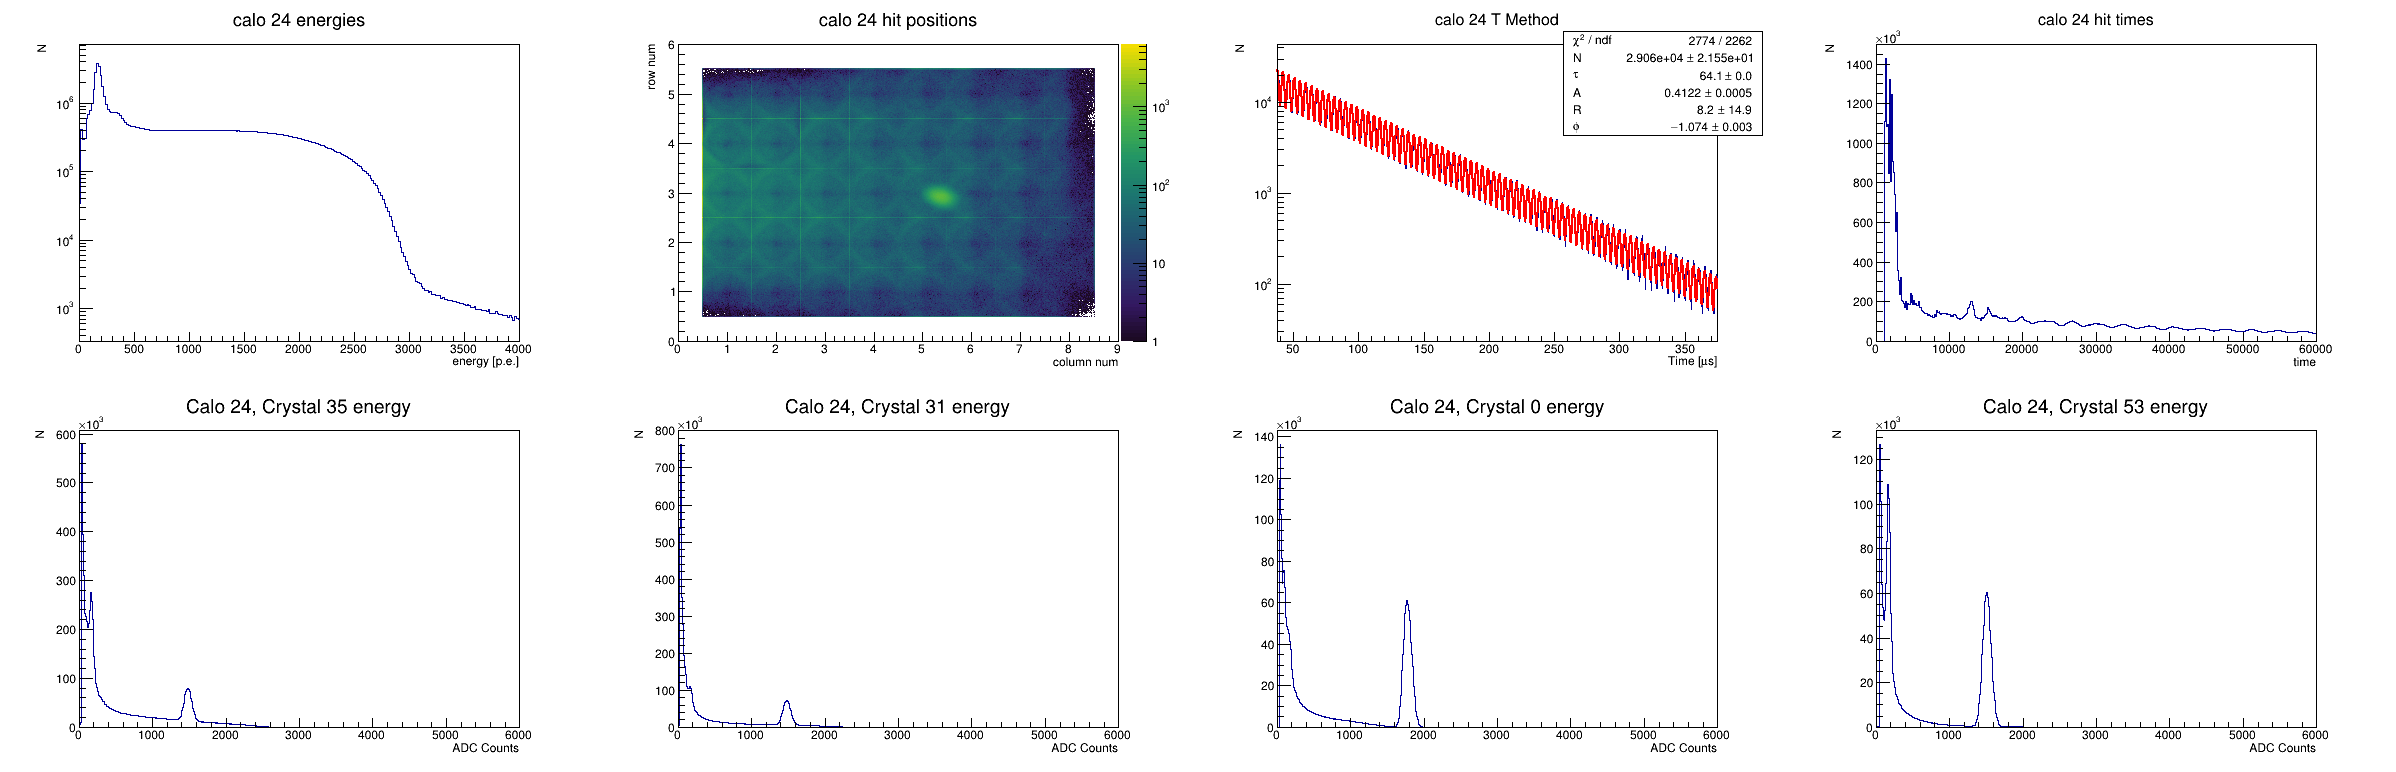

In [14]:
caloNum = 1

wiggleFitParamVec = []
caloiWiggleVec = []
wiggleFitChiSquareVec = []

for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    
    c4 = r.TCanvas("c4","c4",2400,800)
    c4.Divide(4,2)

    c4.cd(1)
    caloiEnergy = f.Get("farline").Get("calo"+str(caloNum)).Get("energy").Clone()
    caloiEnergy.Draw()
    r.gPad.SetLogy()
    c4.Draw()

    c4.cd(2)
    caloiXtalHits = f.Get("farline").Get("calo"+str(caloNum)).Get("hitPositions").Clone()
    caloiXtalHits.Draw("colz")
    r.gPad.SetLogz()

    c4.cd(3)
    caloiWiggle = f.Get("farline").Get("calo"+str(caloNum)).Get("wiggle").Clone()
    caloiWiggle.GetXaxis().SetRangeUser(30000,300000)
    caloiWiggle.Draw()
    r.gPad.SetLogy()

    caloiWiggle.GetXaxis().SetLimits(caloiWiggle.GetXaxis().GetXmin() / 1000 * 1.25,caloiWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    caloiWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    for i in range(2):
        caloiWiggle.Fit("func","REMQ")
    
    wiggleFitParamVec.append( ( func.GetParameter(3) , func.GetParError(3) ) )
    wiggleFitChiSquareVec.append( ( func.GetNDF(),
                                  func.GetChisquare(),
                                  func.GetProb() ) )
    caloiWiggleVec.append( caloiWiggle.Clone("calo"+str(caloNum).zfill(2)+" Wiggle Plot") )

    c4.cd(4)
    caloiTimes = f.Get("farline").Get("calo"+str(caloNum)).Get("times").Clone()
    caloiTimes.GetXaxis().SetRangeUser(0,60000)
    caloiTimes.Draw()

    c4.cd(5)
    caloiXtal35Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal35Energy").Clone()
    caloiXtal35Energy.Draw()

    c4.cd(6)
    caloiXtal31Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal31Energy").Clone()
    caloiXtal31Energy.Draw()

    c4.cd(7)
    caloiXtal0Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal0Energy").Clone()
    caloiXtal0Energy.Draw()

    c4.cd(8)
    caloiXtal53Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal53Energy").Clone()
    caloiXtal53Energy.Draw()

    c4.Draw()
    c4.Print("./images/"+prodString+"/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.png")
    c4.Print("./images/"+prodString+"/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.root")

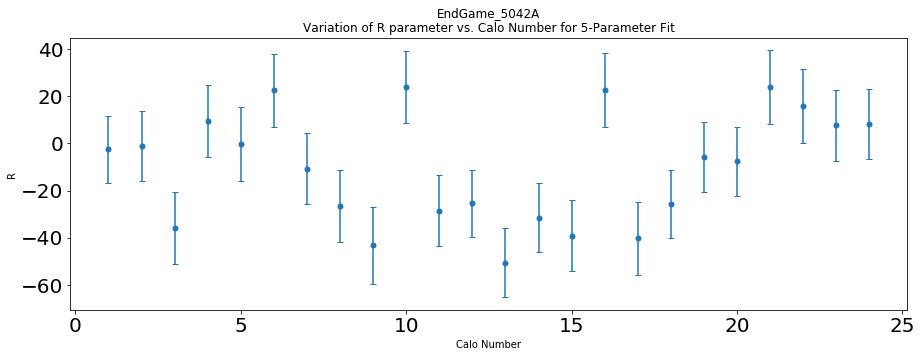

In [15]:
pars, parErrs = zip(*wiggleFitParamVec)
fig,ax = plt.subplots(figsize=(15,5))

calos = [x for x in range(1,25)]
plt.errorbar(x=calos,y=pars,yerr=parErrs,ls='none',capsize=3,capthick=1,marker='o',markersize=5)
plt.title(prodString+"\nVariation of R parameter vs. Calo Number for 5-Parameter Fit")
plt.xlabel("Calo Number")
plt.ylabel("R")
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \c


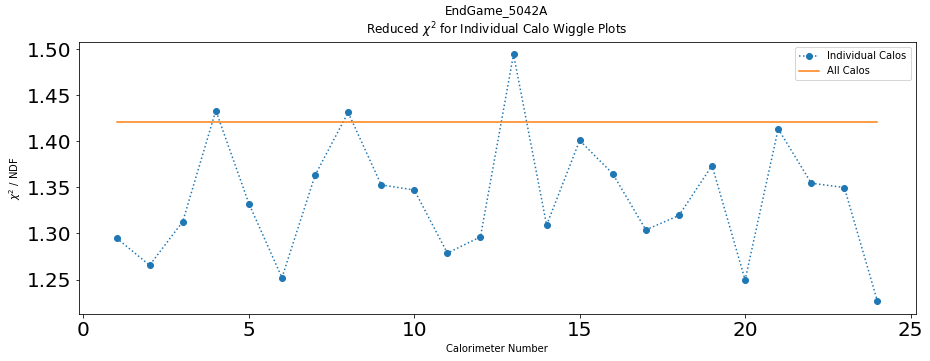

In [16]:
ndfs, chisqs, probs = zip(*wiggleFitChiSquareVec)
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(calos,[x / ndfs[i] for i,x in enumerate(chisqs)],'o:',label='Individual Calos')

ding = [chiSqAll[1]/chiSqAll[0] for i in range(24)]
plt.plot(calos, ding, '-',label="All Calos")

plt.ylabel("$\chi^2$ / NDF")
plt.xlabel("Calorimeter Number")
plt.title(prodString+"\nReduced $\chi^2$ for Individual Calo Wiggle Plots")
plt.legend()
plt.show()

[<ROOT.TH1D object ("calo01 Wiggle Plot") at 0x7fca836700e0>, <ROOT.TH1D object ("calo02 Wiggle Plot") at 0x7fca83659110>, <ROOT.TH1D object ("calo03 Wiggle Plot") at 0x7fca89107880>, <ROOT.TH1D object ("calo04 Wiggle Plot") at 0x7fffed13b490>, <ROOT.TH1D object ("calo05 Wiggle Plot") at 0x7fca891597a0>, <ROOT.TH1D object ("calo06 Wiggle Plot") at 0x7fca829688d0>, <ROOT.TH1D object ("calo07 Wiggle Plot") at 0x7fca8914a570>, <ROOT.TH1D object ("calo08 Wiggle Plot") at 0x7fffed96dd30>, <ROOT.TH1D object ("calo09 Wiggle Plot") at 0x7fffed959400>, <ROOT.TH1D object ("calo10 Wiggle Plot") at 0x7fffed96b590>, <ROOT.TH1D object ("calo11 Wiggle Plot") at 0x7fca8154bc50>, <ROOT.TH1D object ("calo12 Wiggle Plot") at 0x7fffed988a60>, <ROOT.TH1D object ("calo13 Wiggle Plot") at 0x7fffedb203c0>, <ROOT.TH1D object ("calo14 Wiggle Plot") at 0x7fca804743c0>, <ROOT.TH1D object ("calo15 Wiggle Plot") at 0x7fca80428110>, <ROOT.TH1D object ("calo16 Wiggle Plot") at 0x7fca7fbc0e90>, <ROOT.TH1D object ("cal

Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_Calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_Calo01.root has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_Calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_Calo02.root has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potentia

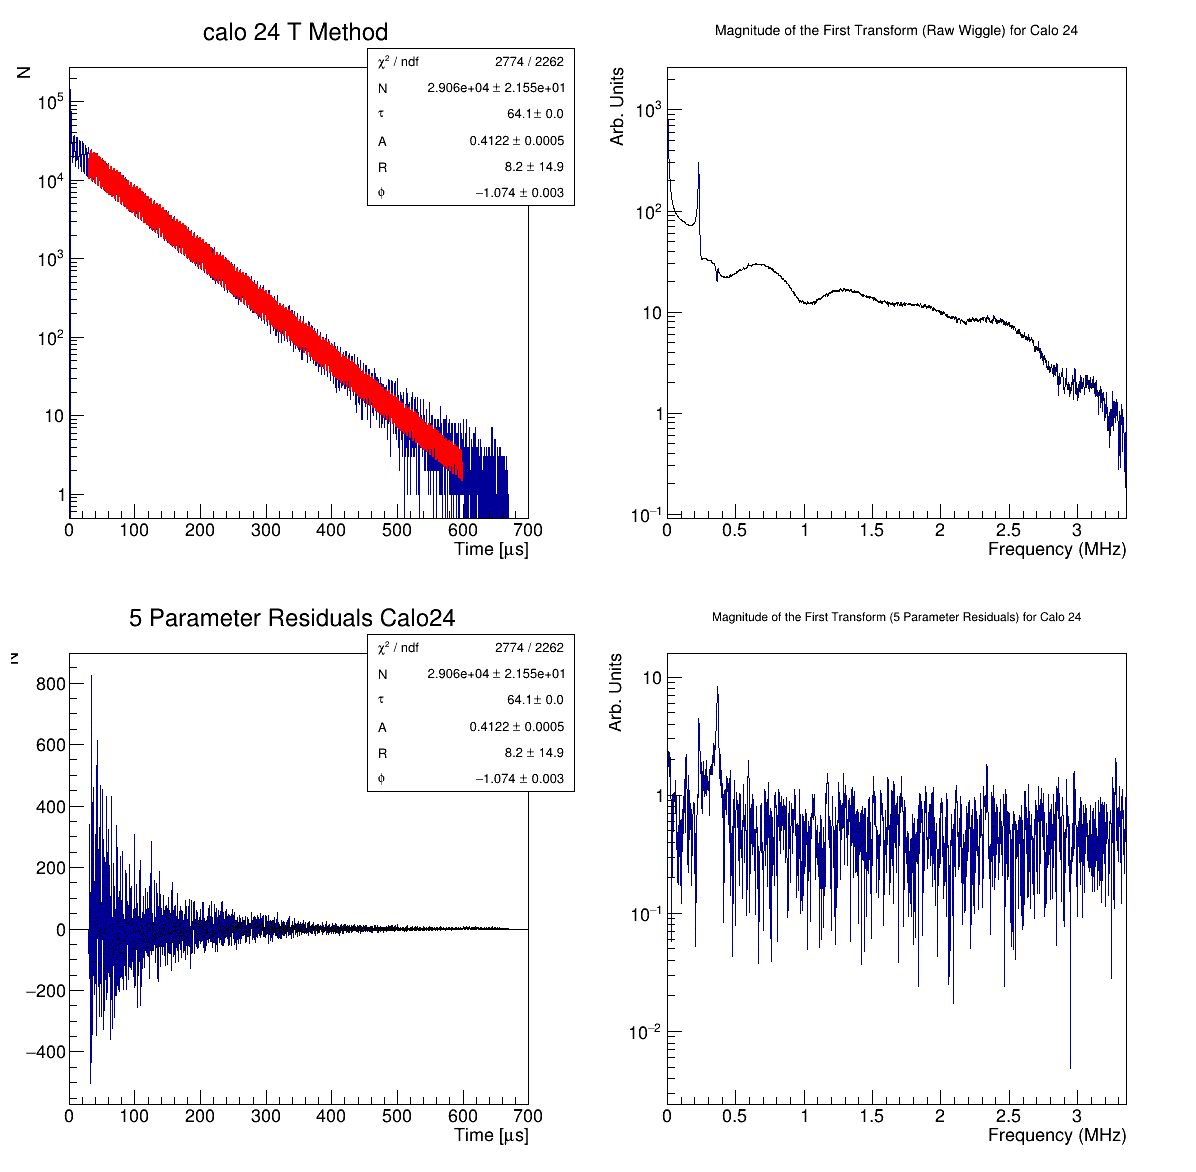

In [17]:
print(caloiWiggleVec)
caloiResidVec = []

for i in range(24):
    caloNum = i+1
    c = r.TCanvas()
    caloiWiggleVec[i].Draw("goff")
    funci = caloiWiggleVec[i].GetFunction("func")
    #c.Draw()
    
#    print("tau = ",funci.GetParameter(1), "for calo", caloNum)
    residuals5paramCaloi = caloiWiggleVec[i].Clone()
    nBins = residuals5paramCaloi.GetSize() - 2
#    print("    ", nbins , "bins" )
    for bini in range(int(nBins) ):
        binCenterX = caloiWiggleVec[i].GetXaxis().GetBinCenter(bini)
        if (binCenterX > 30):
            residuals5paramCaloi.SetBinContent(bini, caloiWiggleVec[i].GetBinContent(bini) - funci.Eval(binCenterX))
        else:
            residuals5paramCaloi.SetBinContent(bini, 0)
            
    residuals5paramCaloi.Draw("HIST P0 L")
#    c.Draw()
    
    hxformRaw = r.TH1D()
    hxformRaw = 0
    r.TVirtualFFT.SetTransform(0)
    hxformRaw = caloiWiggleVec[i].FFT(hxform,"MAG P")
    hxformRaw.SetTitle("Magnitude of the First Transform (Raw Wiggle) for Calo "+str(caloNum))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxformRaw.GetEntries()
    hxformRaw.Scale(1/normXform)
    c2 = r.TCanvas()
    c2.cd()
    #c2.SetLogy()
    hxformRaw.GetXaxis().SetTitle("Frequency (MHz)")
    hxformRaw.GetYaxis().SetTitle("Arb. Units")
    hxformRaw.Draw("HIST P0 L")
#    c2.Draw()
    
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = residuals5paramCaloi.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform (5 Parameter Residuals) for Calo "+str(caloNum))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas()
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
#    c2.Draw()

    Npart = residuals5paramCaloi.GetSize() - 2
    minBinCenter = residuals5paramCaloi.GetXaxis().GetBinCenter(0)
    maxBinCenter = residuals5paramCaloi.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
#    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
#    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
#    print(limmax,limmaxMHz)
    nbins = residuals5paramCaloi.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    caloiResidVec.append( hxform.Clone() )
    
    hxformRaw.SetBins(Npart,0,limmaxMHz)
    hxformRaw.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    
    caloiWiggleVec[i].GetXaxis().SetRangeUser(0,700)
    residuals5paramCaloi.GetXaxis().SetRangeUser(0,700)
    
    c3 = r.TCanvas("c3","c3",1200,1200)
    c3.Divide(2,2)
    c3.cd(1)
    caloiWiggleVec[i].Draw()
    r.gPad.SetLogy()    
    c3.cd(2)
    r.gPad.SetLogy()    
    hxformRaw.Draw("HIST P0 L")
    c3.cd(3)
    residuals5paramCaloi.SetTitle("5 Parameter Residuals Calo"+str(caloNum))
    residuals5paramCaloi.Draw("HIST P0 L")
    c3.cd(4)
    r.gPad.SetLogy()    
    hxform.Draw("HIST P0 L")
    c3.Draw()
    c3.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_Calo"+str(caloNum).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_Calo"+str(caloNum).zfill(2)+".root")   

Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_all.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_allSum.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_allSum.png has been created


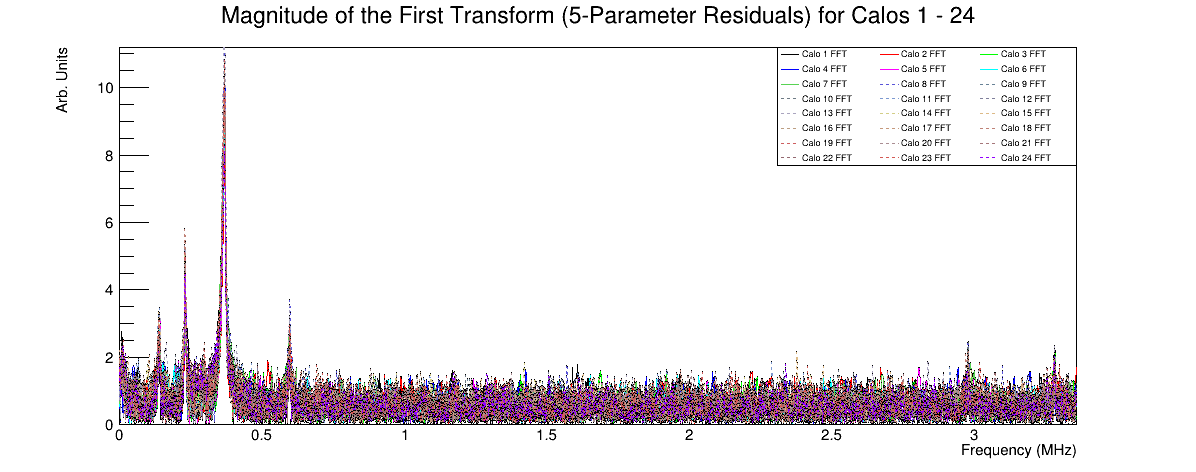

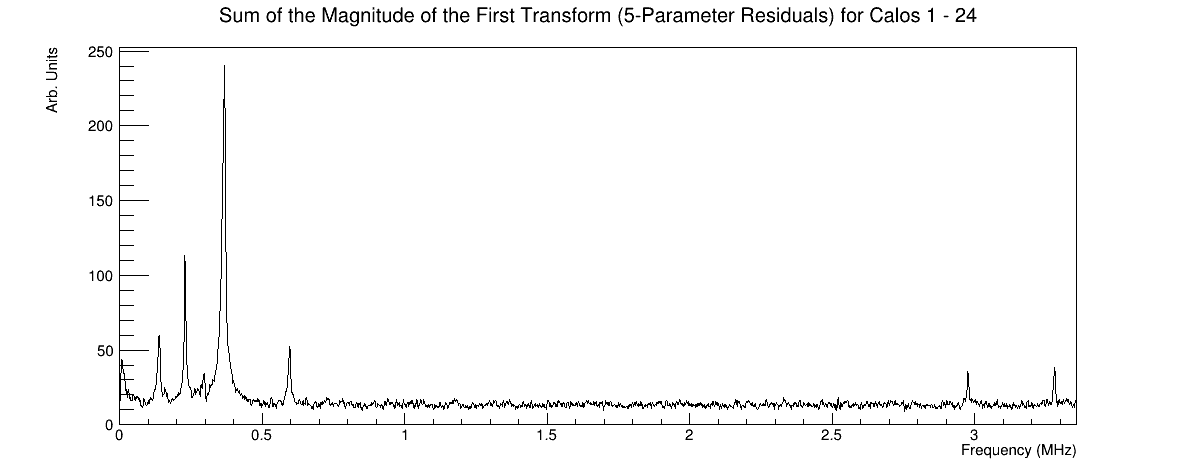

In [18]:
c6 = r.TCanvas("c6","c6",1200,500)
leg = r.TLegend(0.65,0.65,0.9,0.9)
c6.cd()
for i, hist in enumerate(caloiResidVec):
    hist.SetLineColor(i+1)
    if(i>3):
        hist.SetLineColor(i+2)
    if(i>6):
        hist.SetLineStyle(2)
    if(i>7):
        hist.SetLineColor(i+40-12)
    if (i < 0.9):
        hist.SetTitle("Magnitude of the First Transform (5-Parameter Residuals) for Calos 1 - 24")
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist ,"Calo "+str(i+1)+" FFT", "l")

leg.SetNColumns(3)
leg.Draw()
c6.Draw()
c6.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_all.root")
c6.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_all.png")

c7 = r.TCanvas("c7","c7",1200,500)
hsum = caloiResidVec[0].Clone()
for i in range(1,24):
    hsum.Add(caloiResidVec[i])
hsum.SetTitle("Sum of the Magnitude of the First Transform (5-Parameter Residuals) for Calos 1 - 24")
hsum.Draw("HIST P0 L")
c7.Draw()
c7.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum.root")
c7.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum.png")

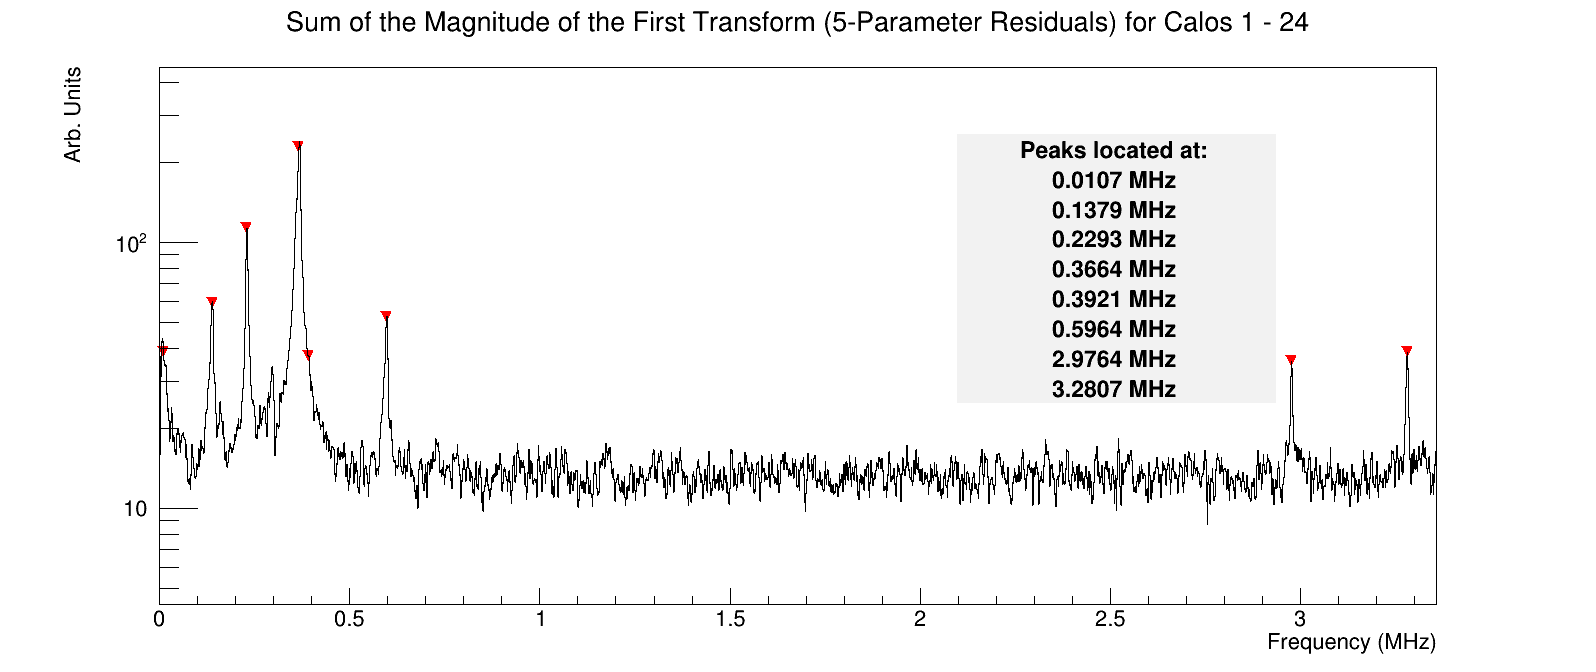

In [19]:
spec = r.TSpectrum(10)
npeaks = spec.Search(hsum, 
                3,      #sigma, see manual
                "",     #options
                0.05)

c = r.TCanvas("c","c",1600,700)
hsum.Draw("pl")
hsum.Draw("hist same")
spec.Draw("same")

text = r.TPaveText(.6,.4,.8,.8,"NDC")
text.AddText("Peaks located at:")
peaks = []
for x in range(npeaks):
    peaks.append(spec.GetPositionX()[x])
peaks.sort()
for x in range(npeaks):
    text.AddText(str(round(peaks[x],4))+" MHz")
if(npeaks == 0):
    print("ERROR: No peaks found in xtal", i)
    text.AddText("No peaks found")
    potentialLostCauses.append(i)
text.Draw("SAME")

r.gPad.SetLogy()

c.Draw()

Now lets compare the 5-parameter residuals from the 24 calos to those from the total.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_allSum_Comparison.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_Residual5Param_allSum_Comparison.png has been created


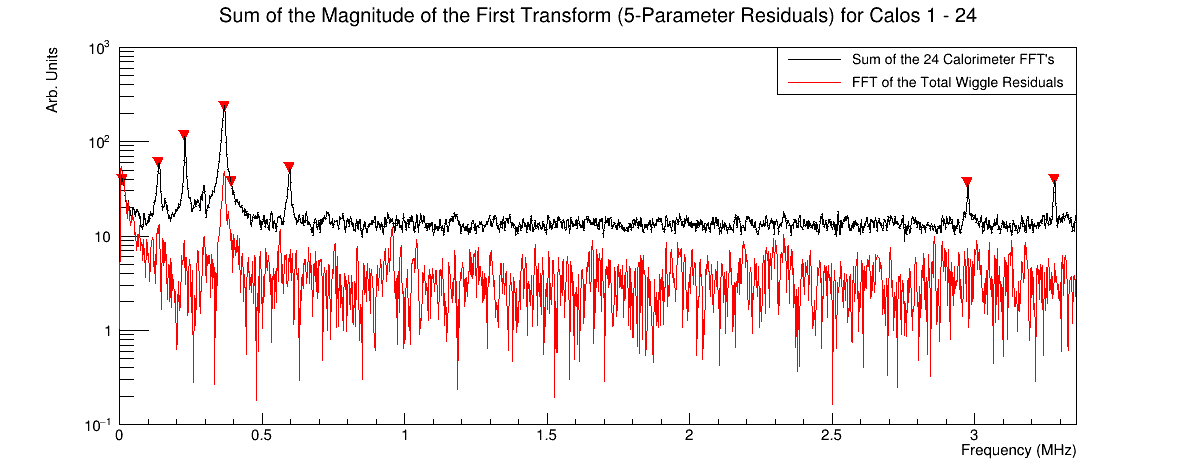

In [20]:
c = r.TCanvas("c","c",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)

hsum.Draw("P0 L")
hsum.Draw("same HIST P0 L")
hsum.GetYaxis().SetRangeUser(0.1,1000)
residuals5paramXform.SetLineColor(2)
residuals5paramXform.SetMarkerColor(2)
residuals5paramXform.Draw("HIST P0 L SAME")

leg.AddEntry(hsum,"Sum of the 24 Calorimeter FFT's",'l')
leg.AddEntry(residuals5paramXform,"FFT of the Total Wiggle Residuals",'l')
leg.Draw()
c.SetLogy()
c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum_Comparison.root")
c.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum_Comparison.png")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo01.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo02.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_energySpectrum_calo03.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Pri

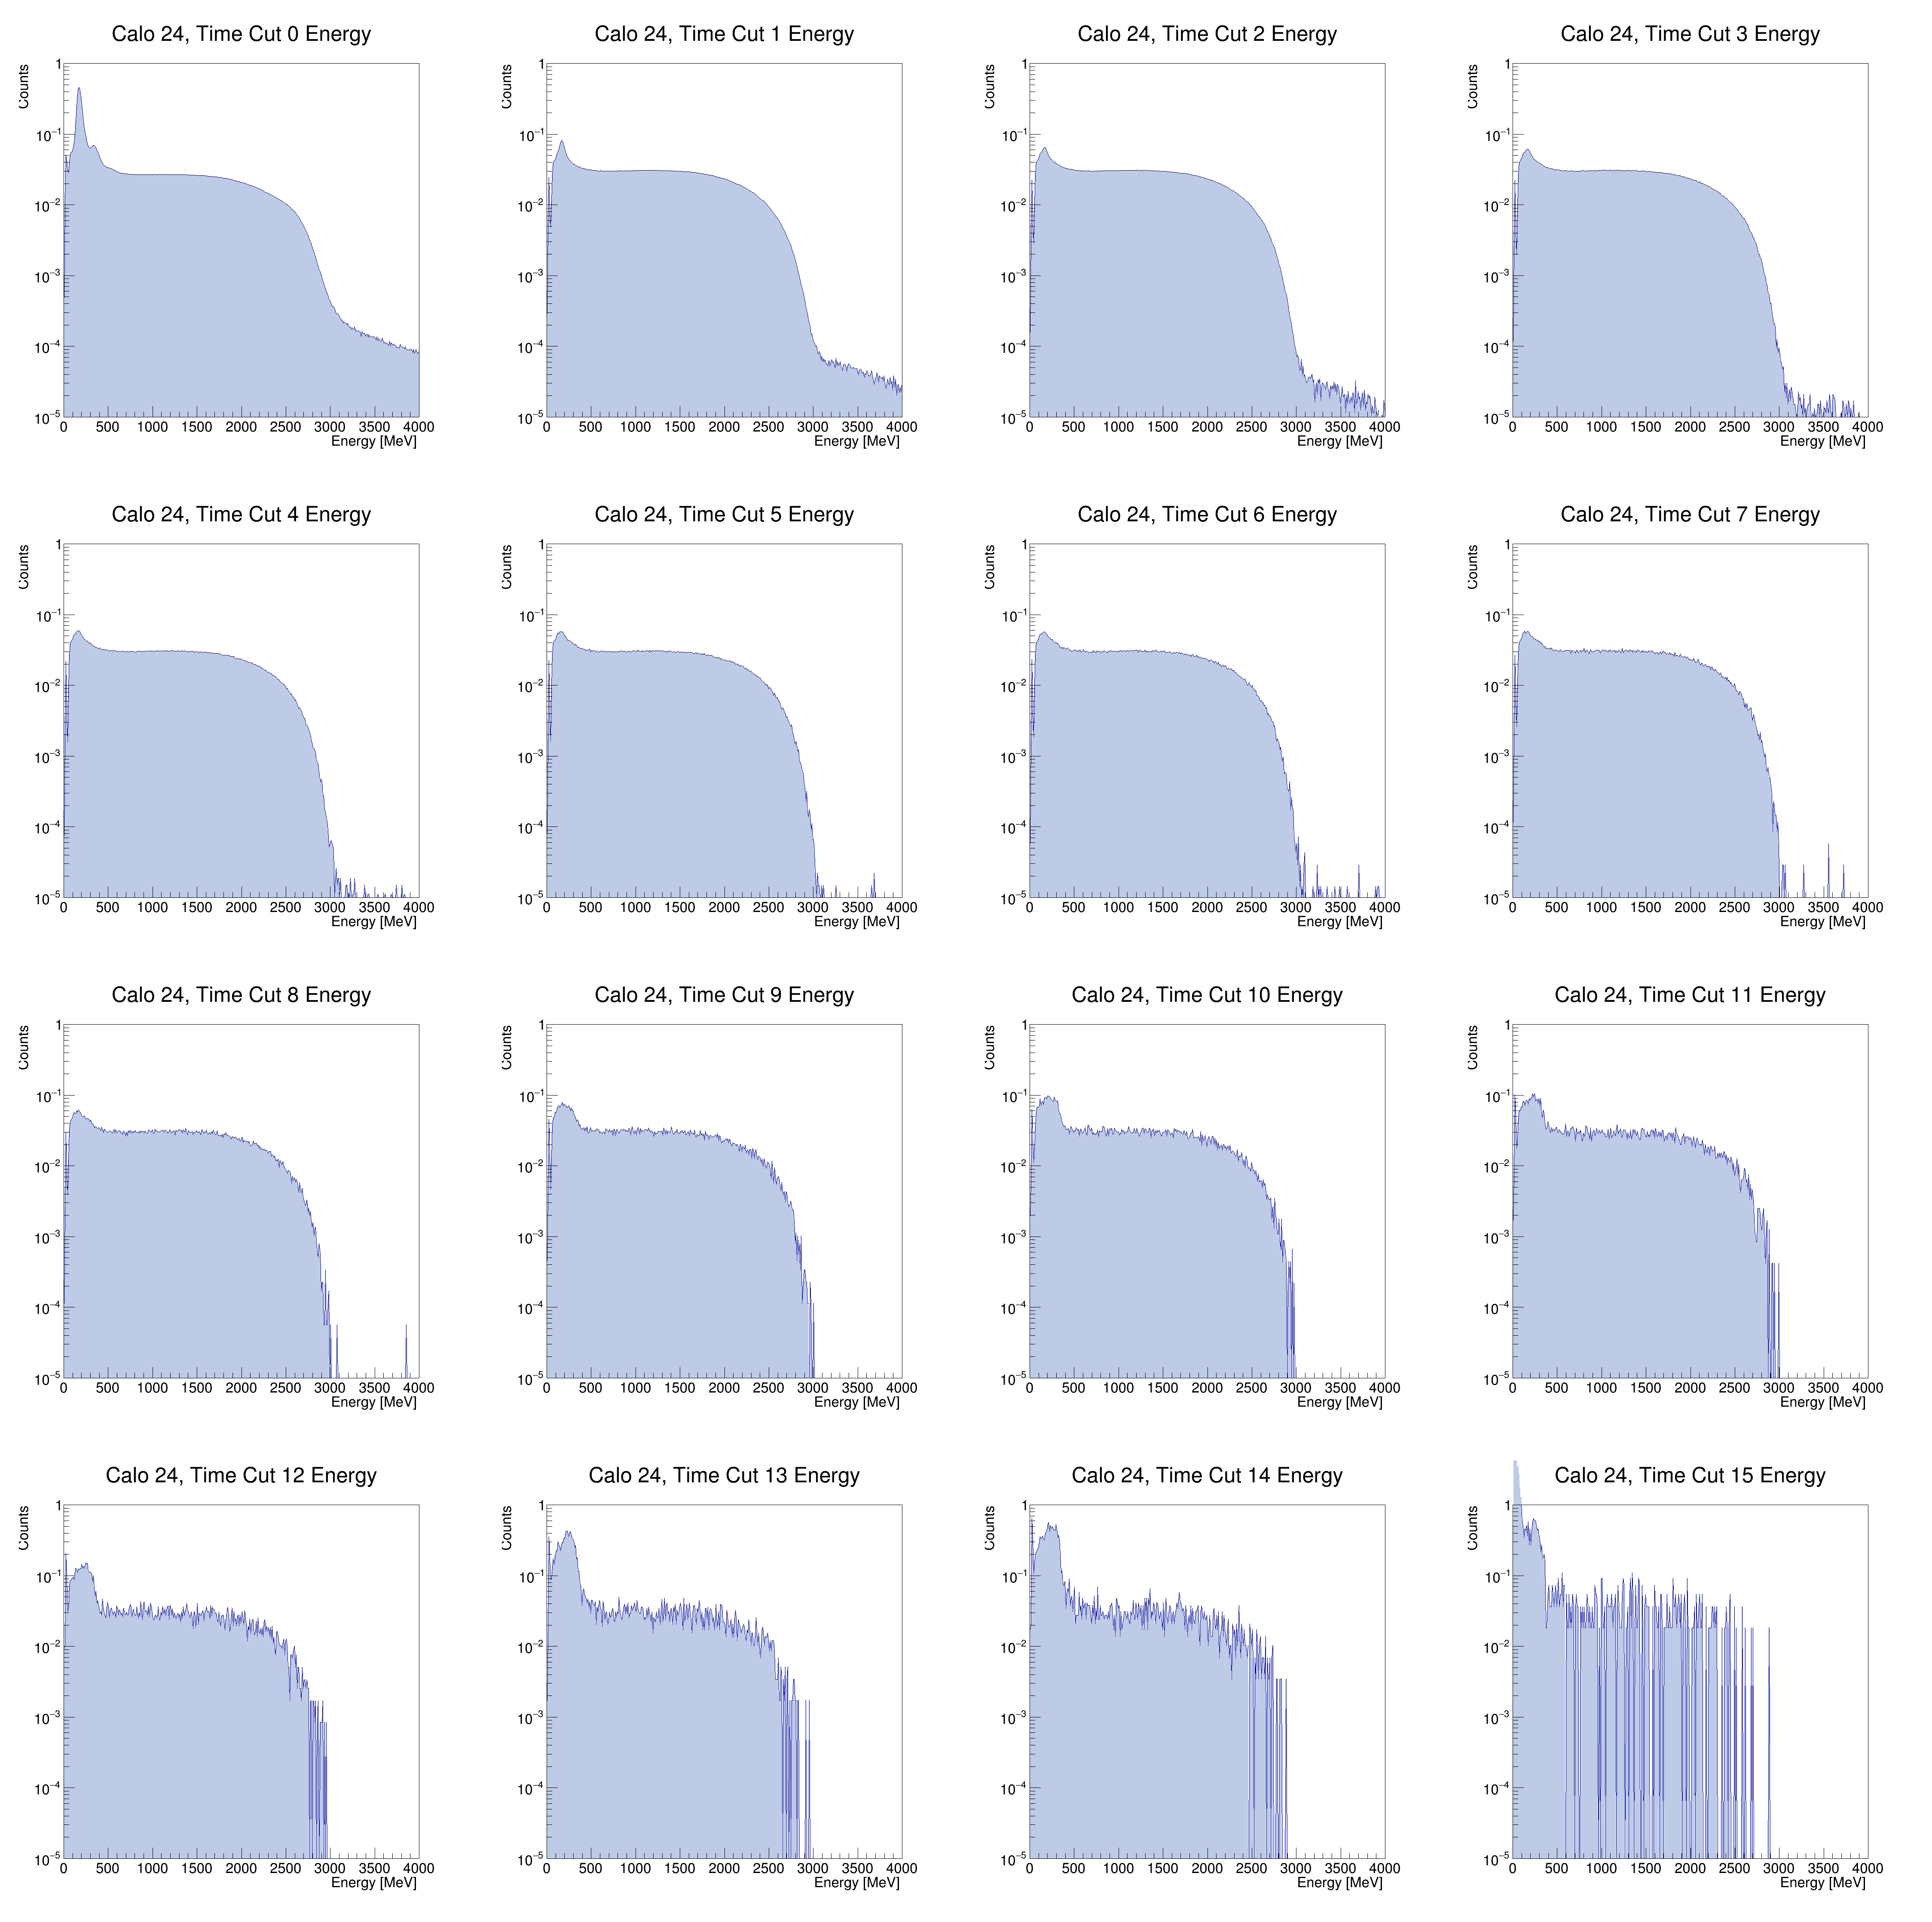

In [21]:
for calo in range(1,25): 
    print("Starting calo", calo)
    c3 = r.TCanvas("c3","c3",4500,4500)
    c3.Divide(4,4)

    nDivs = 16
    for div in range(nDivs):
        c3.cd(div+1)
        r.gROOT.SetSelectedPad(r.gPad)
        
        #hi = f2.Get("energySpectrum_calo"+str(calo).zfill(2)+"_div"+str(div))
        hi = f.Get("farline").Get("calo"+str(calo)).Get("calo"+str(calo)+"TimeCut"+str(div)+"Energy")
        int2000_3000 = hi.Integral( hi.FindBin(2000), hi.FindBin(3000) )
        intTotal = hi.Integral()
        if(np.abs(int2000_3000) > 0):
            hi.Scale(1/int2000_3000)
            #hi.Scale(1/intTotal)
            
        hi.GetXaxis().SetRangeUser(0,4000)
        hi.GetYaxis().SetRangeUser(0.00001,1)
        hi.SetFillColorAlpha(38,0.5)
        hi.Draw("HIST P0 L")

        r.gPad.SetLogy()
        
    c3.Draw()

    c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


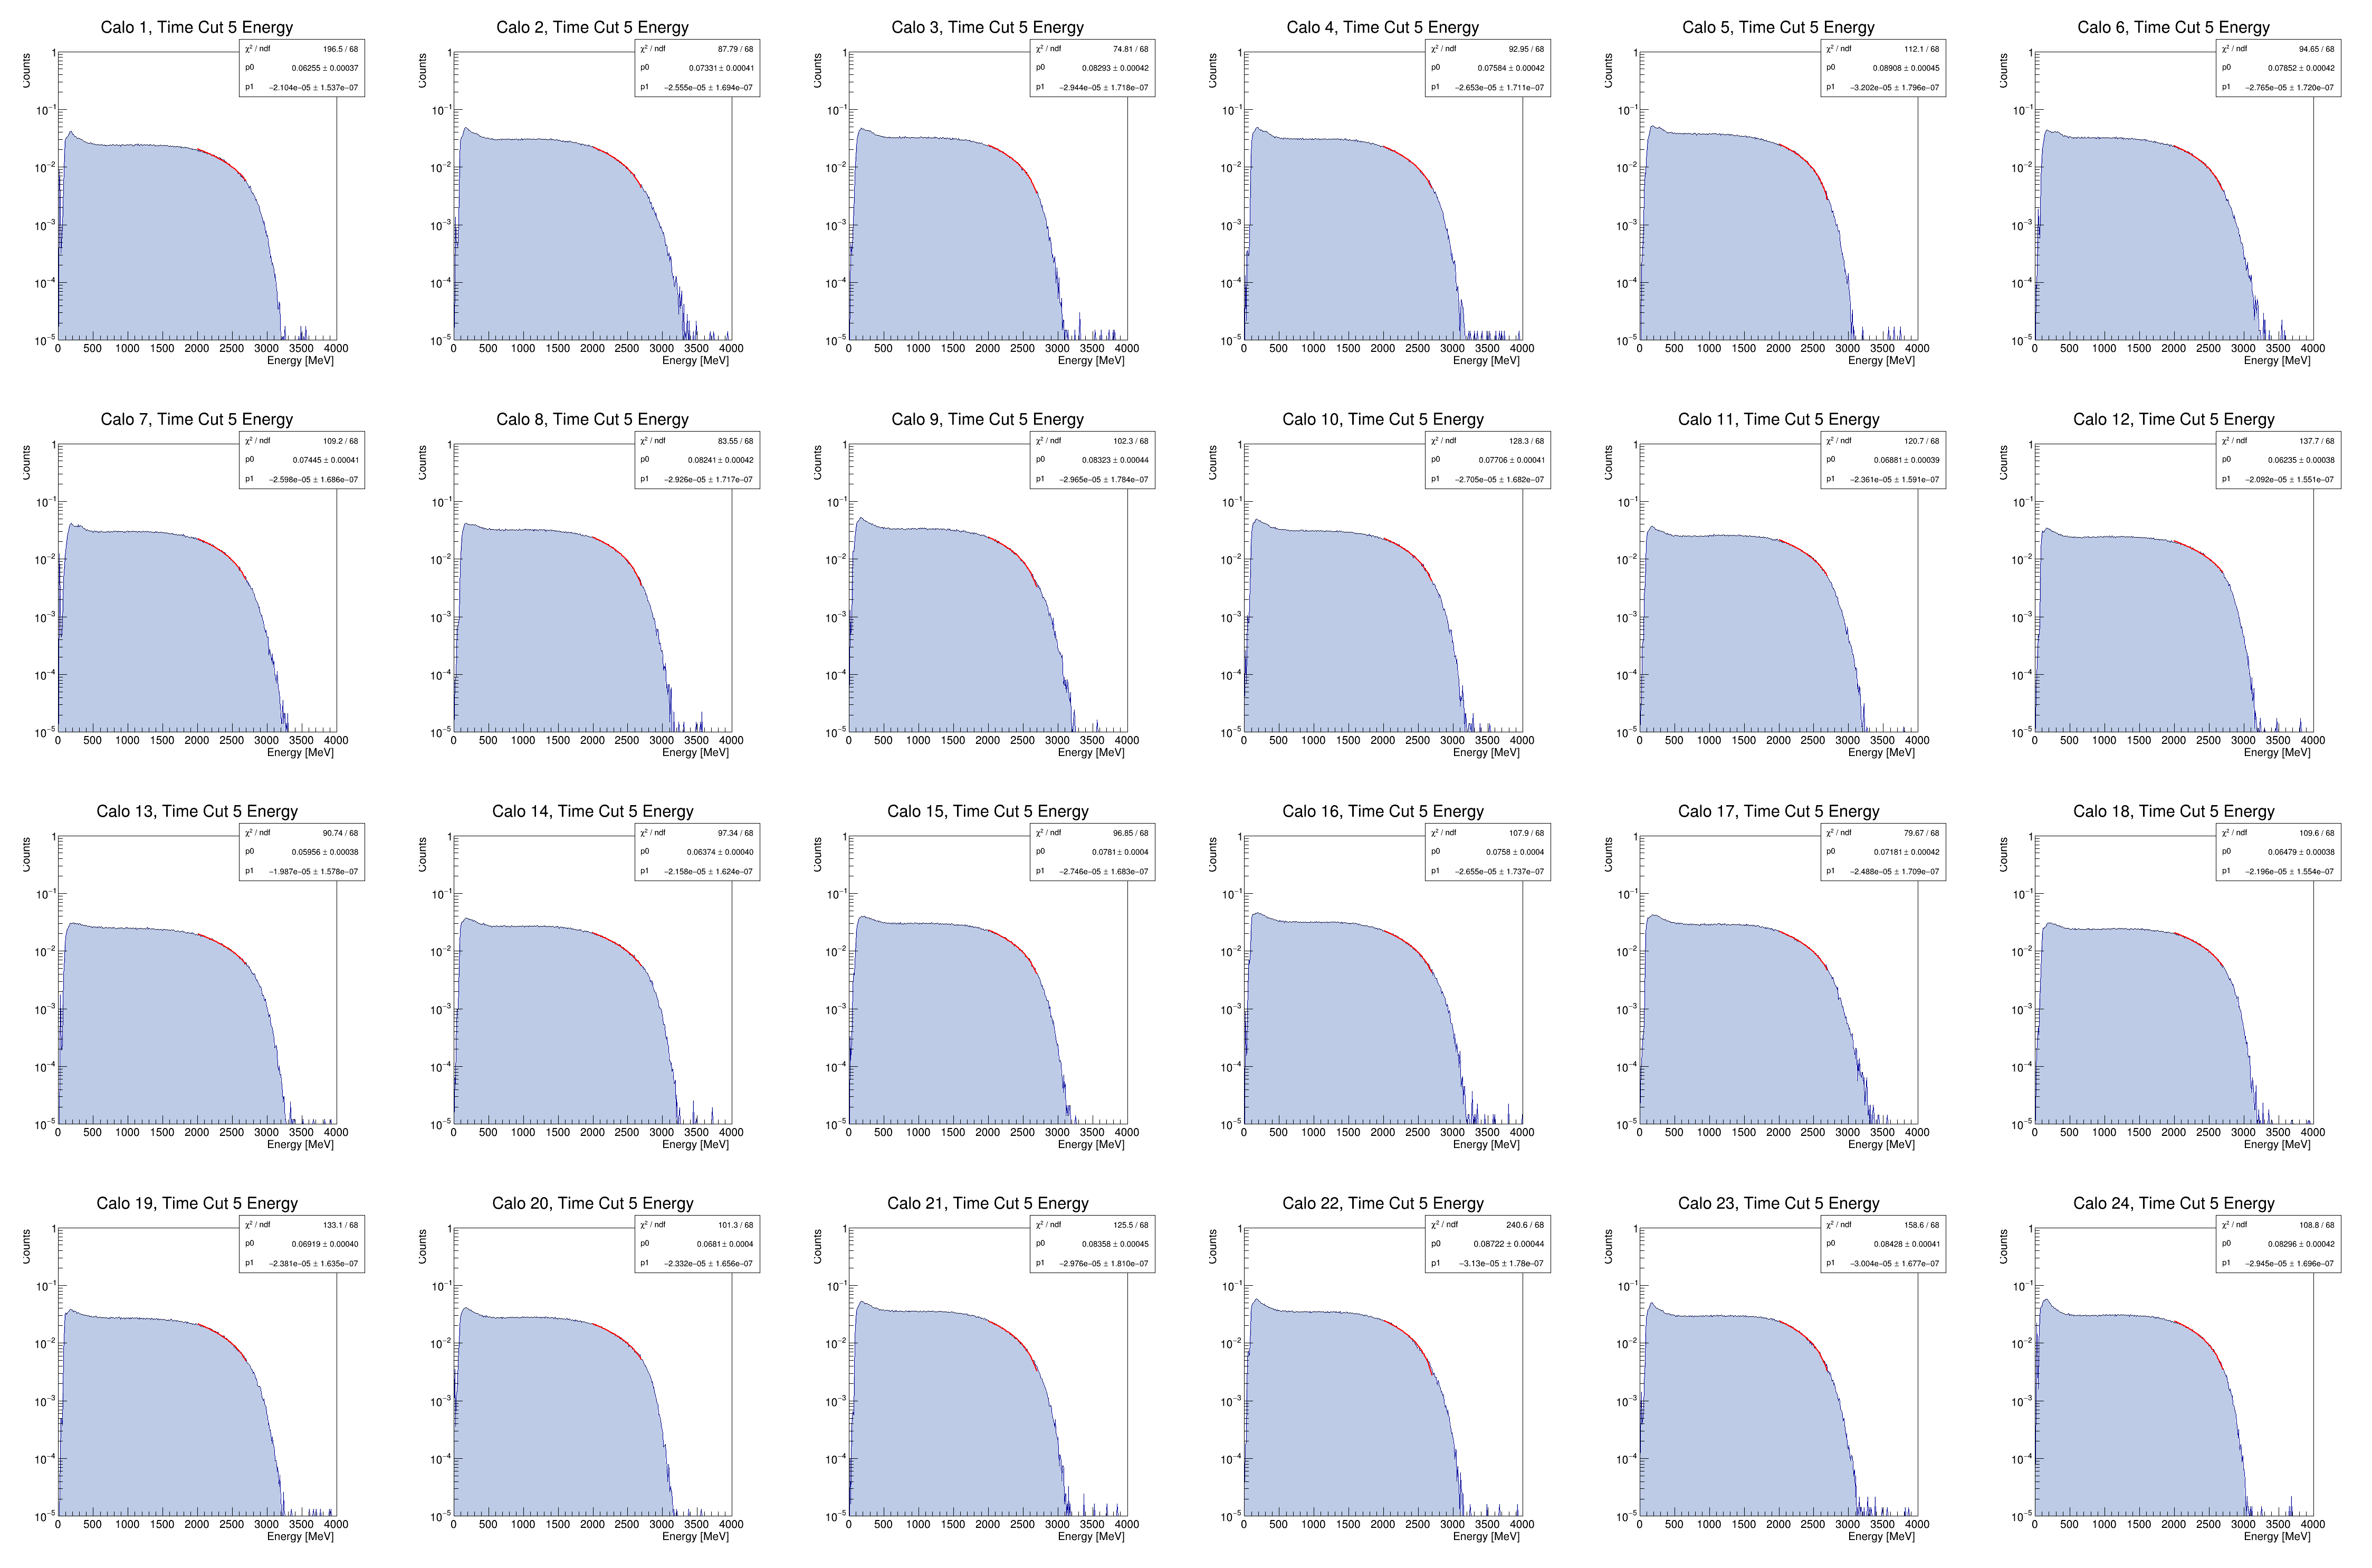

In [22]:
endpoints = []
c3 = r.TCanvas("c3","c3",4500,3000)
c3.Divide(6,4)
for calo in range(1,25): 

    c3.cd(calo)
    r.gROOT.SetSelectedPad(r.gPad)

    #hi = f2.Get("energySpectrum_calo"+str(calo).zfill(2)+"_div"+str(div))
    hi = f.Get("farline").Get("calo"+str(calo)).Get("calo"+str(calo)+"TimeCut5Energy")
    int2000_3000 = hi.Integral( hi.FindBin(2000), hi.FindBin(3000) )
    intTotal = hi.Integral()
    if(np.abs(int2000_3000) > 0):
        hi.Scale(1/int2000_3000)
        #hi.Scale(1/intTotal)

    hi.GetXaxis().SetRangeUser(0,4000)
    hi.GetYaxis().SetRangeUser(0.00001,1)
    hi.SetFillColorAlpha(38,0.5)
    
    func = r.TF1("func","pol1",2000,2700)
    func.SetLineColor(2)
    func.SetParameters(1,-1)
    hi.Fit(func, "REMBQ")
    endpoints.append(-1*func.GetParameter(0)/func.GetParameter(1))
    
    hi.DrawCopy("HIST P0 L")
    func.DrawCopy("SAME")

    r.gPad.SetLogy()
        
c3.Draw()

#c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".png")
#c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".root")

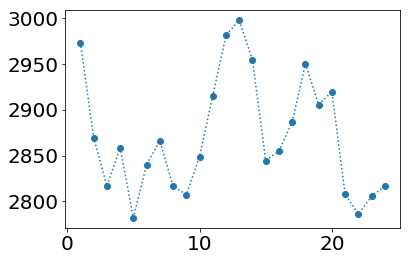

In [23]:
plt.plot([x+1 for x in range(24)],endpoints,"o:")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24
[(1, 86427.95173400255, 1262.5314902228918), (2, 87689.79507910377, 1301.0741793422612), (3, 89525.63885885087, 1315.437428496038), (4, 87459.76403653075, 1282.998361447478), (5, 88652.08265000598, 649.4292064354154), (6, 93512.50348100706, 1082.7786080573887), (7, 89487.7724703209, 524.8753233733956), (8, 84723.5104444127, 492.7514042052878), (9, 101735.32918560195, 569.2017043161243), (10, 110850.59873072815, 601.7193232610603), (11, 92493.37583852802, 515.6258432305117), (12, 83093.06470027454, 466.8086904456371), (13, 89291.09176063686, 461.88321859664154), (14, 79353.5434182566, 440.770738

Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo01.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo02.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo03.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo04.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_calo04.root has been created
Info in <TCanvas::Print>: png file ./images/EndGame_

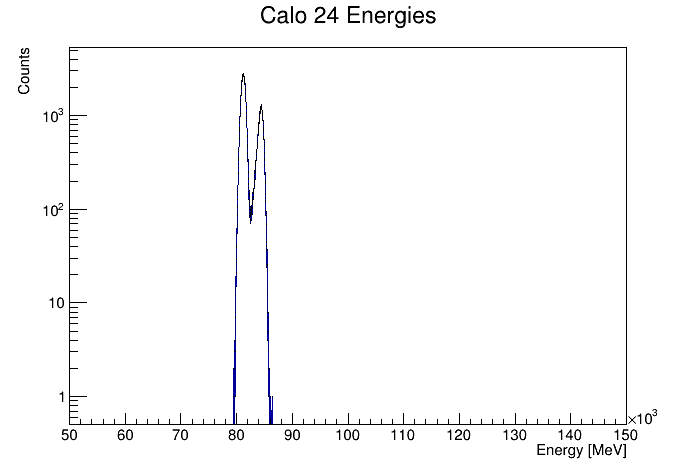

In [24]:
caloStdVec = []

for calo in range(1,25): 
    print("Starting calo", calo)
    c3 = r.TCanvas()

    #hi = f2.Get("laserEnergyPulse_calo"+str(calo).zfill(2))
    hi = f.Get("farline").Get("calo"+str(calo)).Get("laserSyncEnergies")
    hi.GetXaxis().SetTitle("Energy [MeV]")
    hi.Draw("HIST P0 L")
    
    #print("    Mean: ", hi.GetMean(), "and stdev: ", hi.GetStdDev())
    caloStdVec.append((calo, hi.GetMean(), hi.GetStdDev()))
        
    c3.SetLogy()
    c3.Draw()

    c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_calo"+str(calo).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_calo"+str(calo).zfill(2)+".root")
    
print(caloStdVec)

Starting calo 1
0
Starting calo 2
0
Starting calo 3
0
Starting calo 4
0
Starting calo 5
1
Starting calo 6
1
Starting calo 7
1
Starting calo 8
1
Starting calo 9
0
Starting calo 10
0
Starting calo 11
0
Starting calo 12
0
Starting calo 13
1
Starting calo 14
1
Starting calo 15
1
Starting calo 16
1
Starting calo 17
0
Starting calo 18
0
Starting calo 19
0
Starting calo 20
0
Starting calo 21
1
Starting calo 22
1
Starting calo 23
1
Starting calo 24
1
[(1, 86427.95173400255, 1262.5314902228918), (2, 87689.79507910377, 1301.0741793422612), (3, 89525.63885885087, 1315.437428496038), (4, 87459.76403653075, 1282.998361447478), (5, 88652.08265000598, 649.4292064354154), (6, 93512.50348100706, 1082.7786080573887), (7, 89487.7724703209, 524.8753233733956), (8, 84723.5104444127, 492.7514042052878), (9, 101735.32918560195, 569.2017043161243), (10, 110850.59873072815, 601.7193232610603), (11, 92493.37583852802, 515.6258432305117), (12, 83093.06470027454, 466.8086904456371), (13, 89291.09176063686, 461.88

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allCalo.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allCalo.root has been created


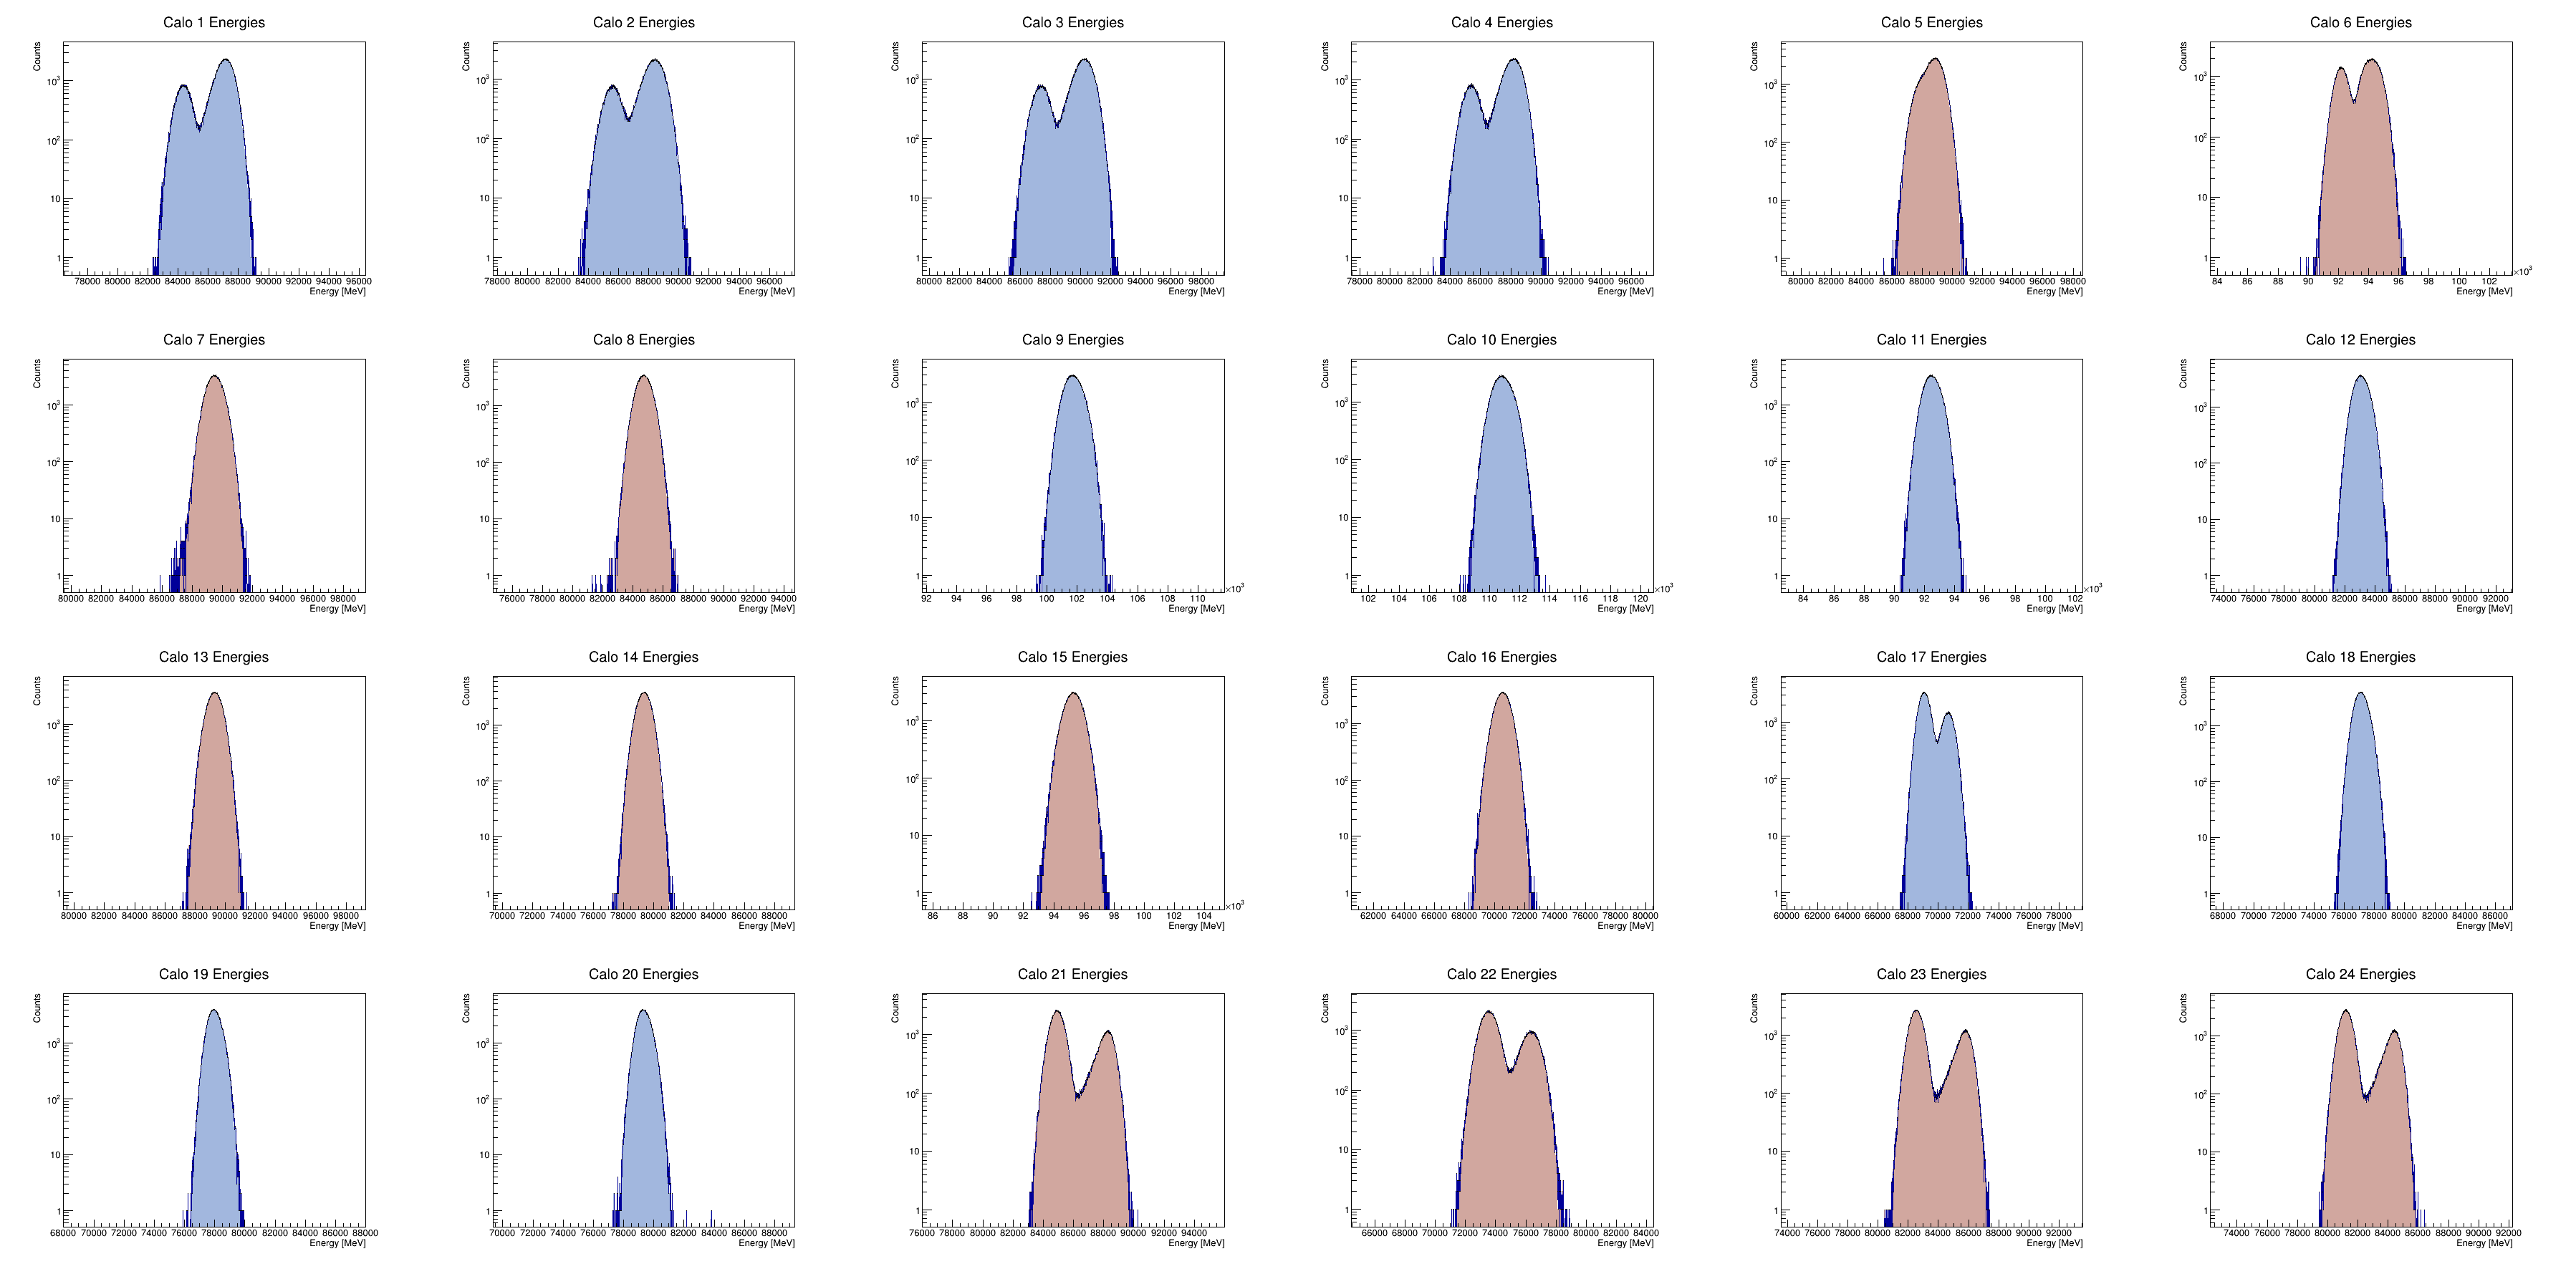

In [25]:
c3 = r.TCanvas("c","c",3600,1800)
c3.Divide(6,4)
colors = [38,45]
for calo in range(1,25): 
    c3.cd(calo)
    print("Starting calo", calo)

    #hi = f2.Get("laserEnergyPulse_calo"+str(calo).zfill(2))
    hi = f.Get("farline").Get("calo"+str(calo)).Get("laserSyncEnergies")
    hi.GetXaxis().SetTitle("Energy [MeV]")
    colori = int(((calo-1) % 8)/4)
    print(colori)
    mean = hi.GetMean(1)
    hi.GetXaxis().SetRangeUser(mean - 10000, mean + 10000)
    hi.SetFillColorAlpha(colors[colori], 0.7)
    hi.DrawCopy("HIST P0 L")
    
    #print("    Mean: ", hi.GetMean(), "and stdev: ", hi.GetStdDev())
       
    r.gPad.SetLogy()
c3.Draw()

c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allCalo.png")
c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allCalo.root")

print(caloStdVec)

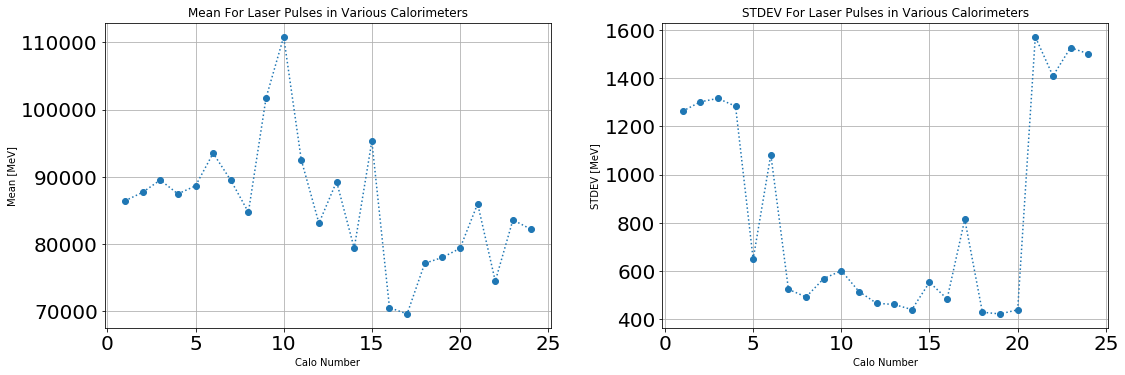

In [26]:
calos, means, stds = zip(*caloStdVec)

fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout()
fig.subplots_adjust(wspace=.25)

ax[1].plot(calos,stds,'o:')
ax[1].set_ylabel("STDEV [MeV]")
ax[1].set_xlabel("Calo Number")
ax[1].set_title("STDEV For Laser Pulses in Various Calorimeters")
ax[1].grid()

ax[0].plot(calos,means,'o:')
ax[0].set_ylabel("Mean [MeV]")
ax[0].set_xlabel("Calo Number")
ax[0].set_title("Mean For Laser Pulses in Various Calorimeters")
ax[0].grid()

plt.savefig("./images/"+prodString+"/"+prodString+"_laserEnergyMeans_allcalo.png", bbox_inches='tight')
plt.show()

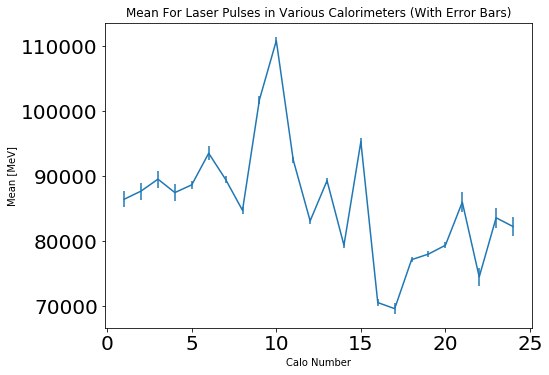

In [27]:
calos, means, stds = zip(*caloStdVec)

fig, ax = plt.subplots(figsize=(7,5))
fig.tight_layout()
#fig.subplots_adjust(wspace=.25)

plt.errorbar(x=calos,y=means,xerr=0,yerr=stds)
plt.ylabel("Mean [MeV]")
plt.xlabel("Calo Number")
plt.title("Mean For Laser Pulses in Various Calorimeters (With Error Bars)")

plt.show()

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allcalo.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allcalo.root has been created


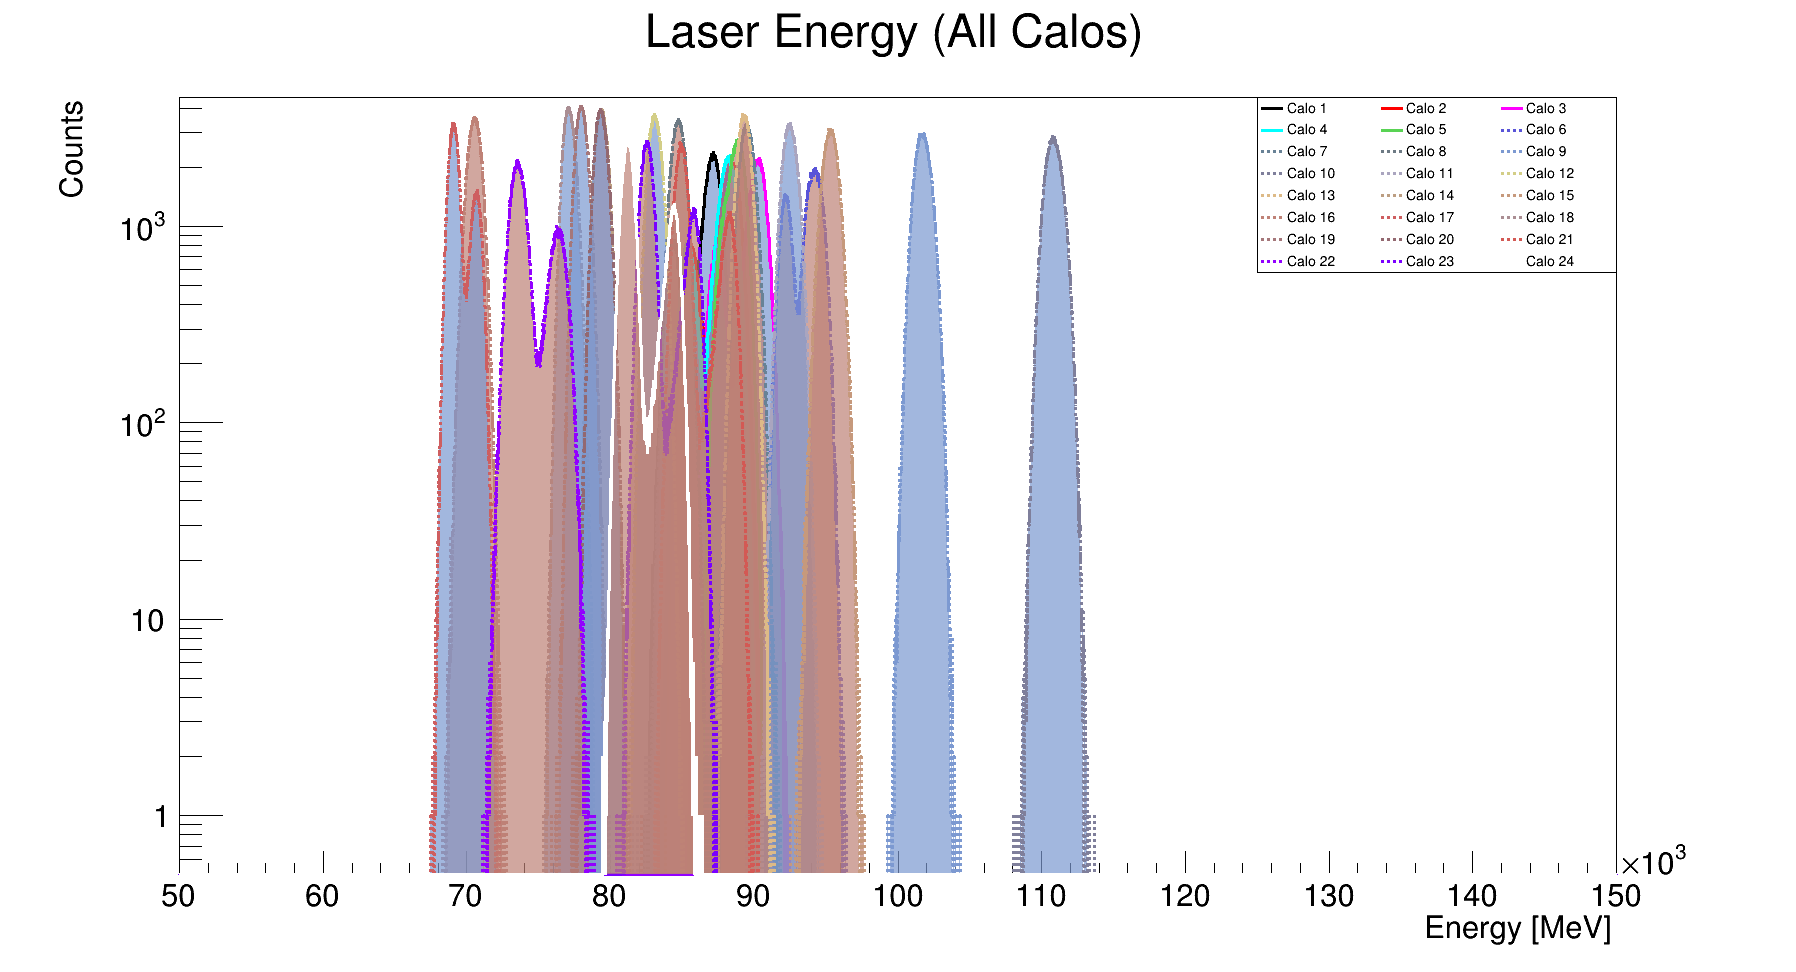

In [28]:
c3 = r.TCanvas("c3","c3",1800,1000)
leg = r.TLegend(0.7,0.72,0.9,0.9)
leg.SetNColumns(3)

for calo in range(1,25): 
    print("Starting calo", calo)

    hi.SetLineColor(calo-1)
    hi.SetLineWidth(3)
    if(calo>3):
        hi.SetLineColor(calo+2)
    if(calo>6):
        hi.SetLineStyle(2)
    if(calo>7):
        hi.SetLineColor(calo+40-12)
    
    hi = f.Get("farline").Get("calo"+str(calo)).Get("laserSyncEnergies")
    hi.SetDirectory(0)
    hi.GetXaxis().SetTitle("Energy [MeV]")
    hi.SetTitle("Laser Energy (All Calos)")
    hi.GetXaxis().SetRangeUser(50000,150000)
    if calo < 1.5:
        hi.Draw()
    else:
        hi.Draw("SAME")
        
    leg.AddEntry(hi ,"Calo "+str(calo), "l")

leg.Draw()

c3.SetLogy()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allcalo.png")
c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allcalo.root")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo01.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo02.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_calo03.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/EndGame_5042A/EndGame_5042A_hitDistribution_

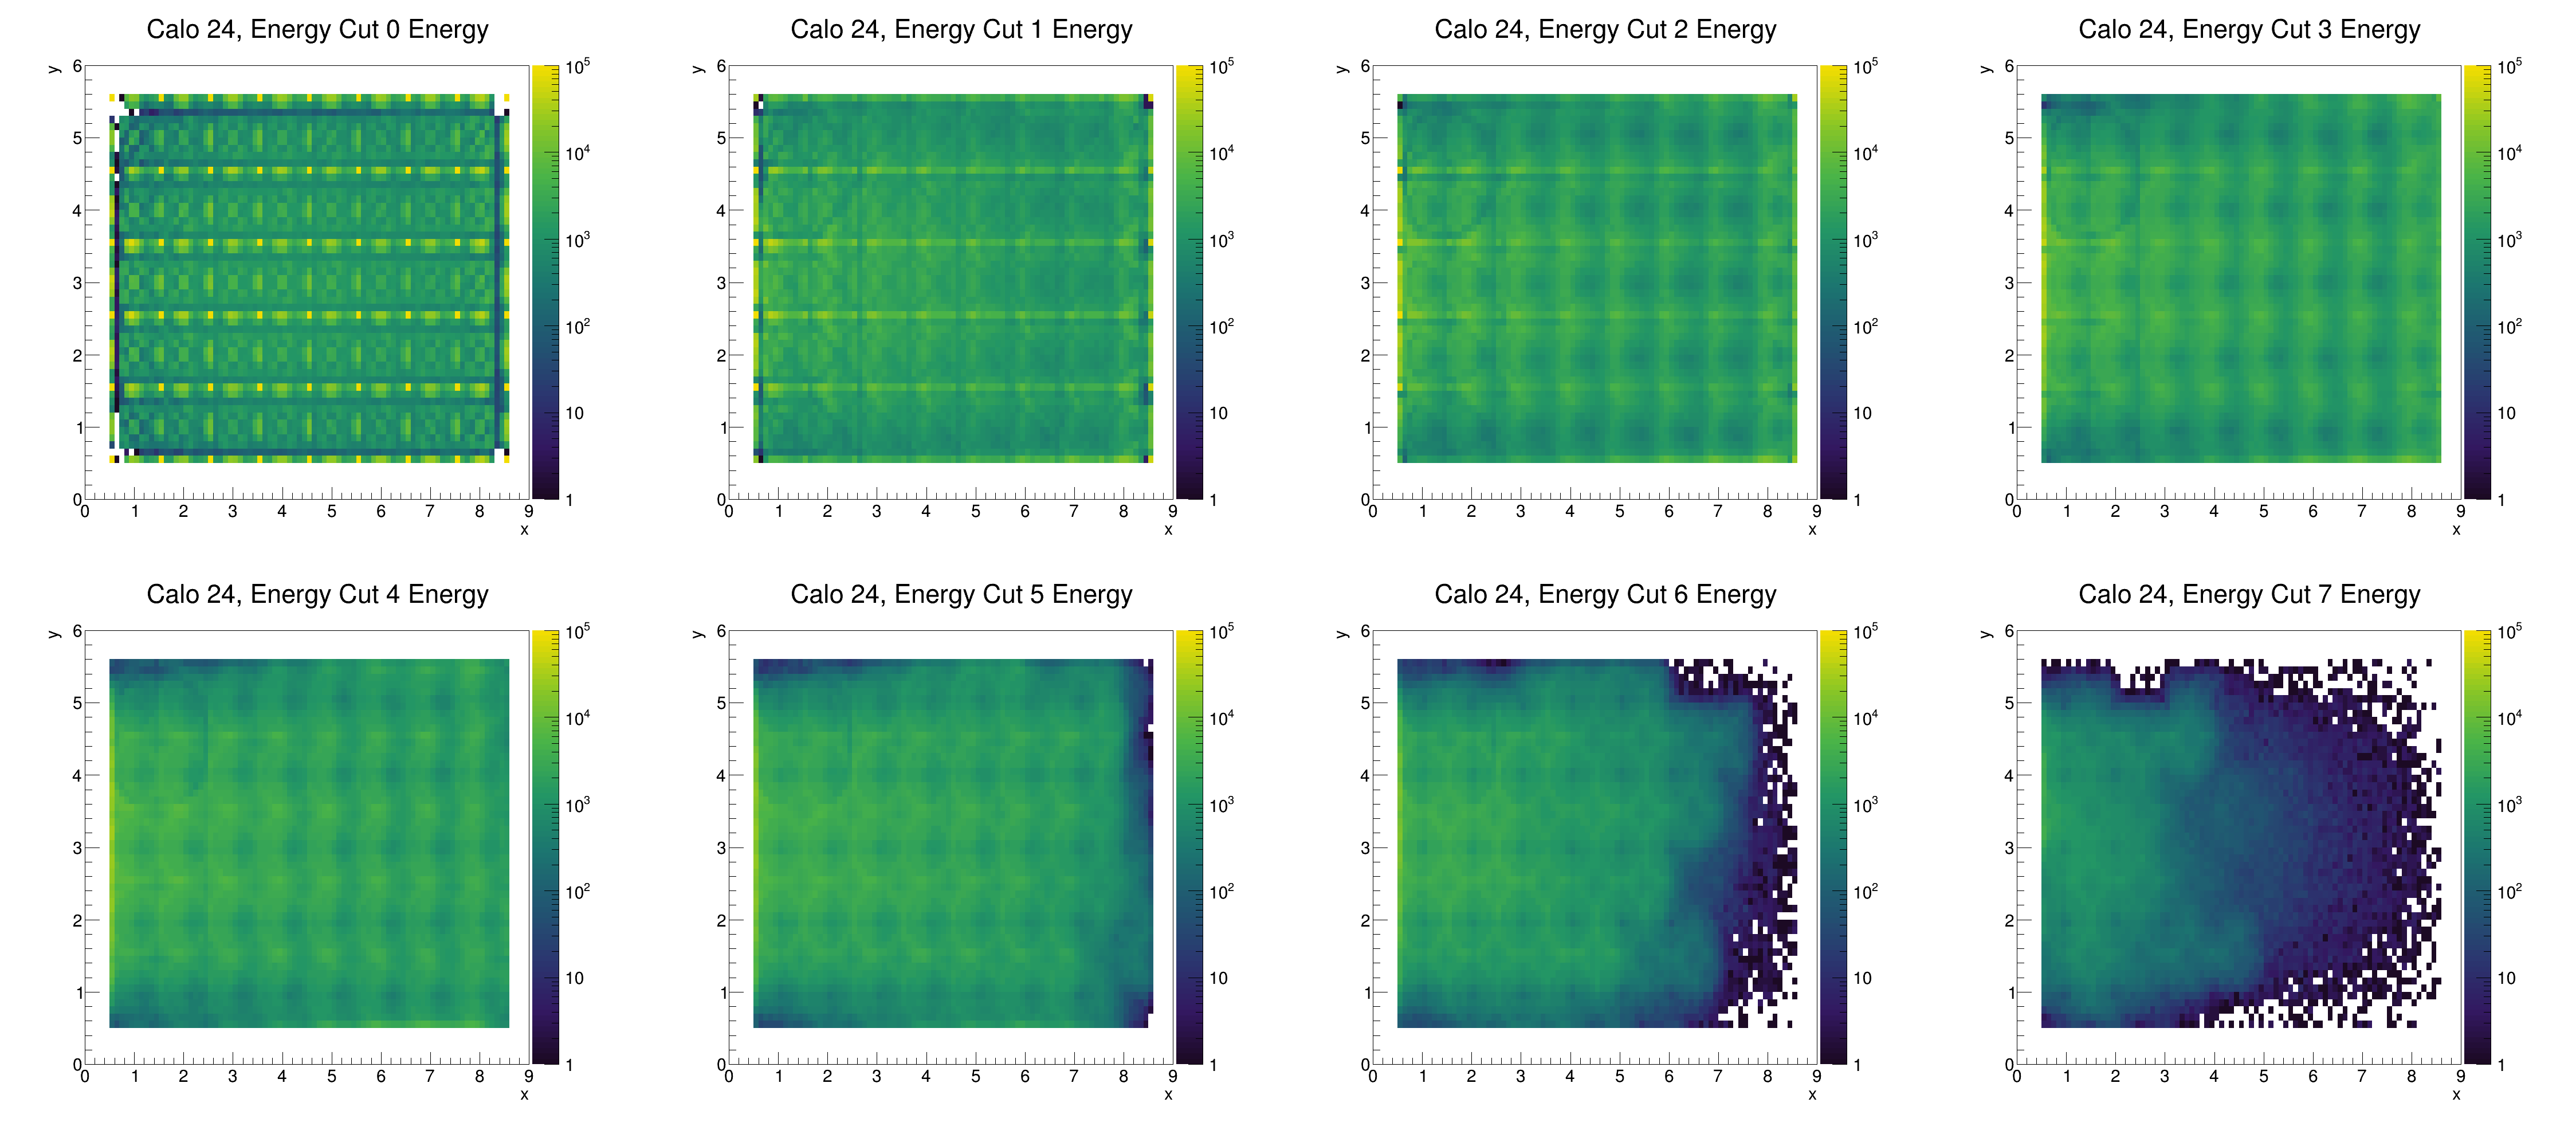

In [29]:
for calo in range(1,25):
    print("Starting calo", calo)
    c = r.TCanvas("c","c",4500,2000)
    c.Divide(4,2)
    for i in range(8):
        c.cd(i+1)
        hi = f.Get("farline").Get("calo"+str(calo)).Get("calo"+str(calo)+"EnergyCut"+str(i)+"Energy").Clone()
        hi.Rebin2D(1,1)
        hi.GetXaxis().SetTitle("x")
        hi.GetYaxis().SetTitle("y")
        r.gPad.SetLogz()
        r.gPad.SetRightMargin(0.15)
        hi.GetZaxis().SetRangeUser(1,100000)
        hi.Draw("COLZ")
    c.Draw()
    c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".png")
    c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


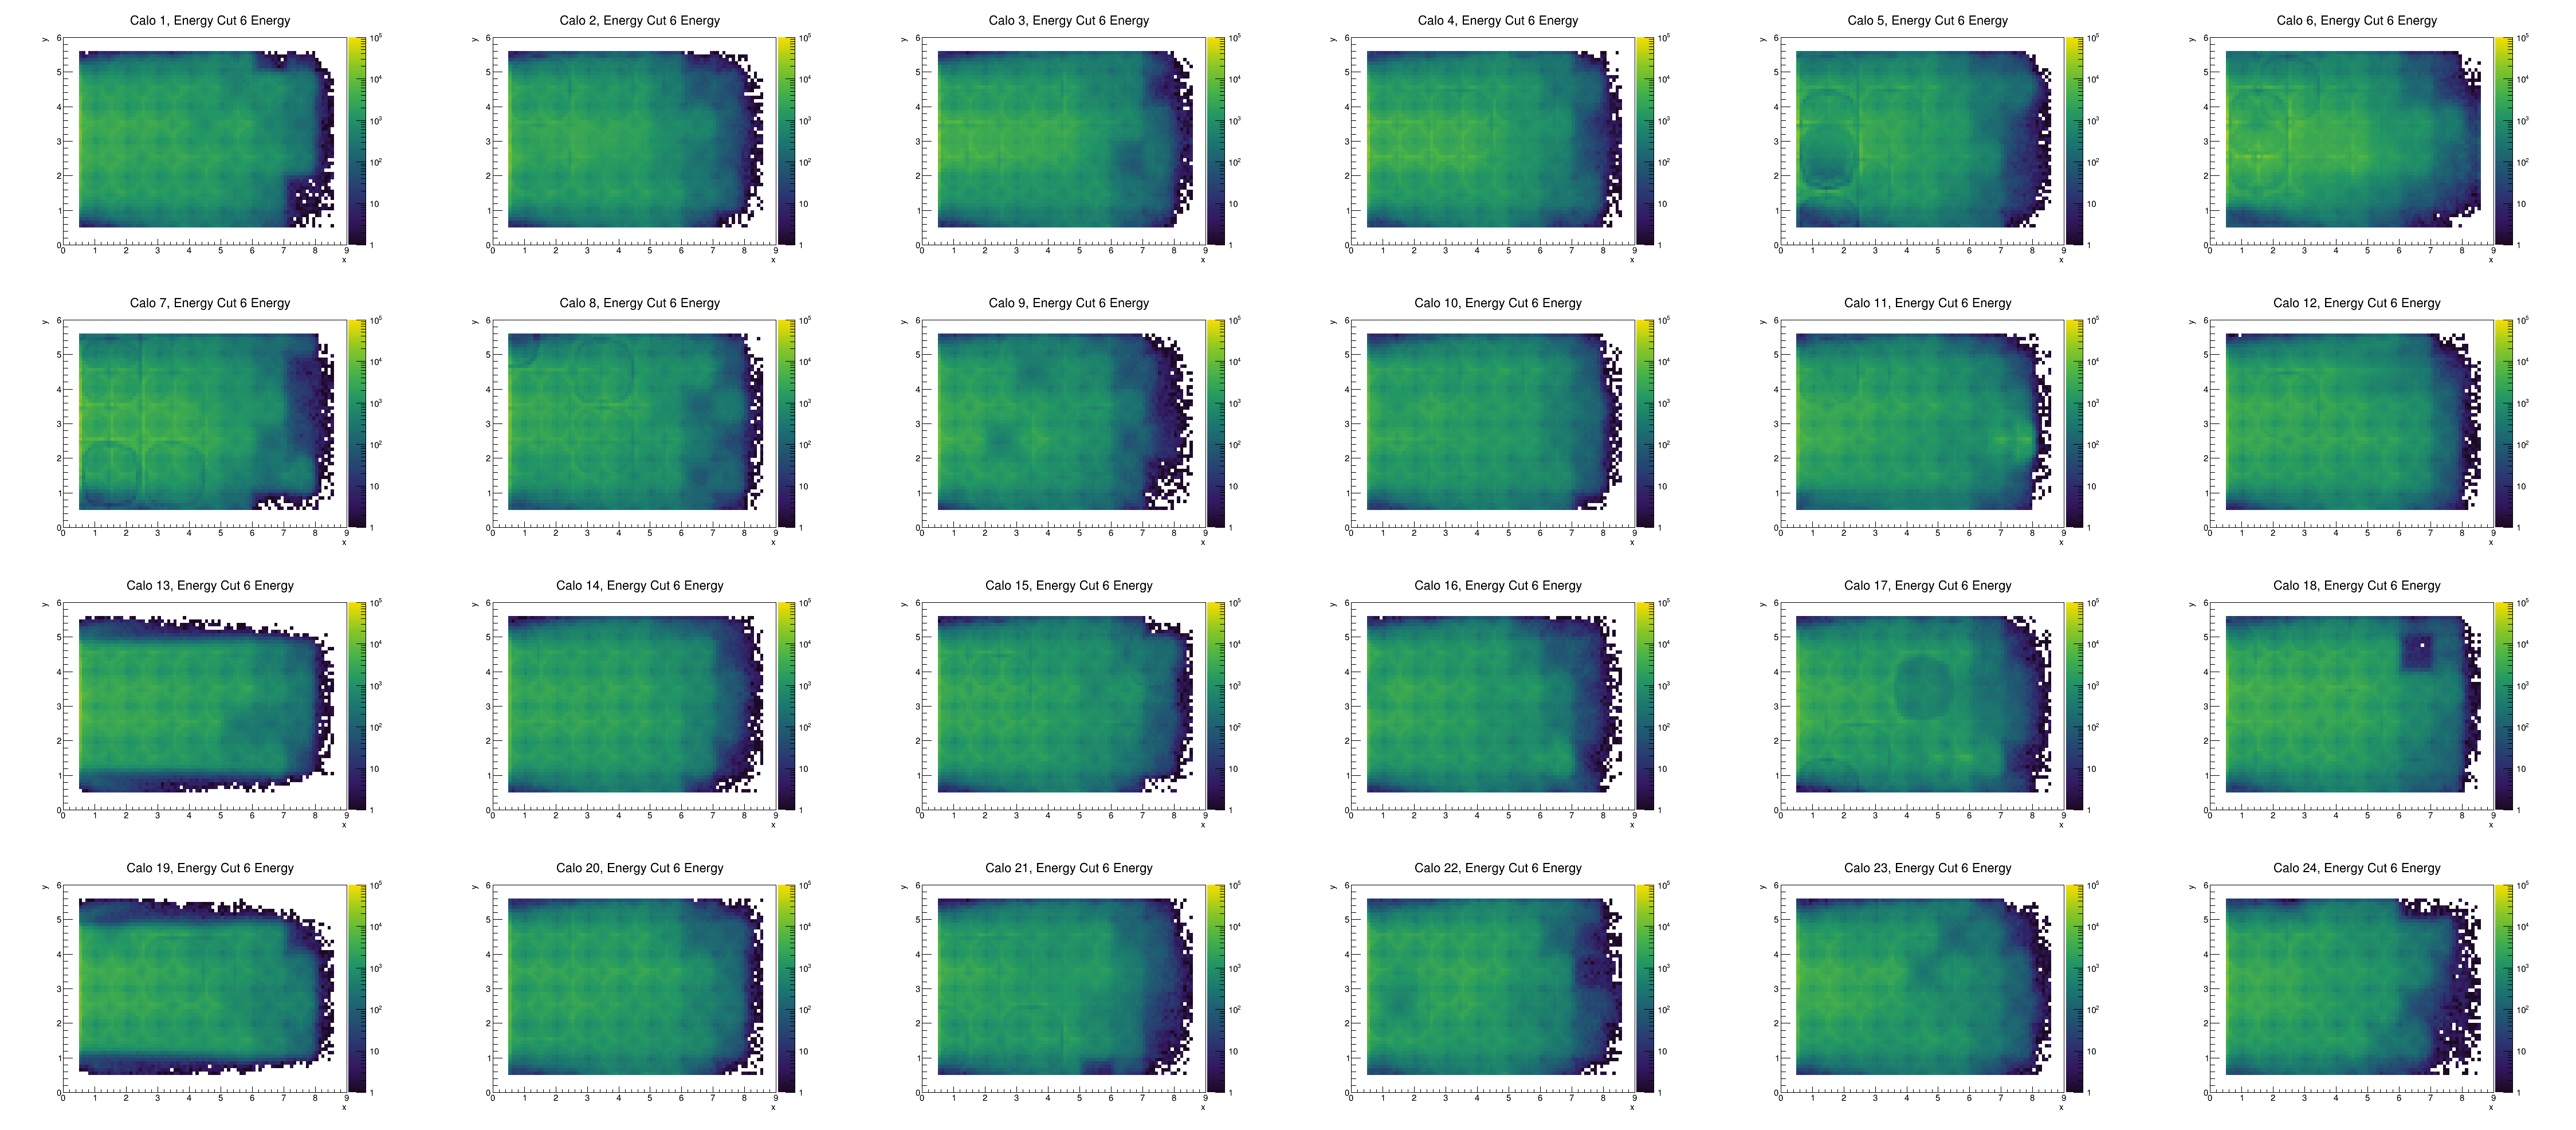

In [34]:
c = r.TCanvas("c","c",4500,2000)
c.Divide(6,4)

means = []
for calo in range(1,25):
    #print("Starting calo", calo)
    c.cd(calo)
    i=6
    hi = f.Get("farline").Get("calo"+str(calo)).Get("calo"+str(calo)+"EnergyCut"+str(i)+"Energy").Clone()
    hi.Rebin2D(1,1)
    hi.GetXaxis().SetTitle("x")
    hi.GetYaxis().SetTitle("y")
    r.gPad.SetLogz()
    r.gPad.SetRightMargin(0.15)
    means.append((hi.GetMean(1), hi.GetMean(2), hi.GetMean(11), hi.GetMean(12)))
    hi.GetZaxis().SetRangeUser(1,100000)
    hi.DrawCopy("COLZ")
c.Draw()
#c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".png")
#c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".root")

In [37]:
meansx, meansy, stdevsx, stdevsy = zip(*means)

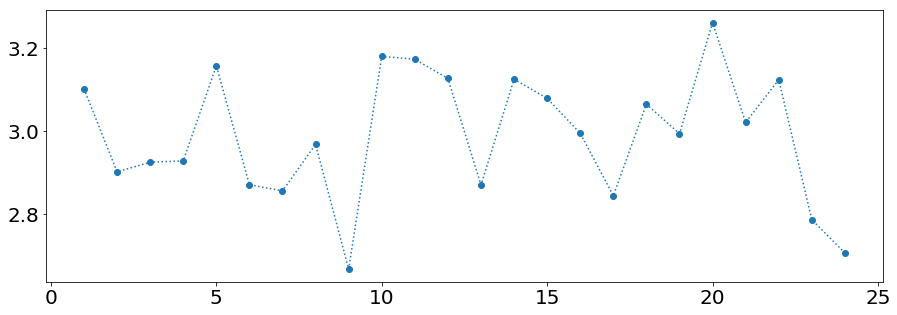

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar([x for x in range(1,25)], meansx, xerr=0, yerr=stdevsx, fmt="o:")
plt.title("X-Means")
plt.show()

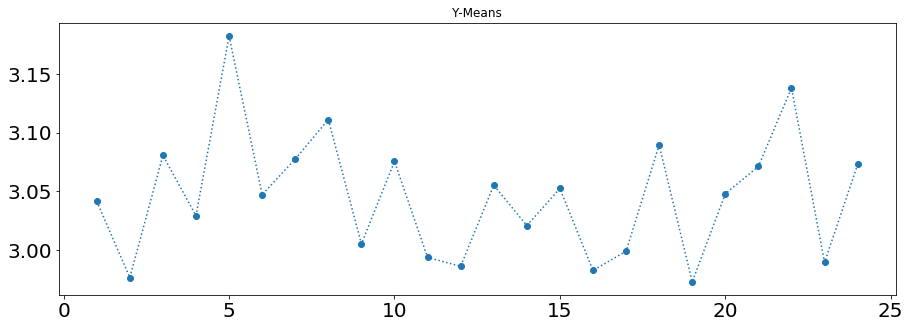

In [41]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar([x for x in range(1,25)], meansy, xerr=0, yerr=stdevsy, fmt="o:")
plt.title("Y-Means")
plt.show()